In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()
%matplotlib inline


# Any results you write to the current directory are saved as output.

In [3]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test_2.csv')
sample_df = pd.read_csv('../input/sample_submission.csv')

In [4]:
train_df.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [5]:
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (73147, 16)
Test shape :  (31349, 15)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


Looking at info of data-set it is found that in training data only 2 columns 'age' and 'training engagement rating' has null values all others do not have any null values.  

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          19558 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


In test set also only those 2 columns have null values. So let's remove try out the methods for removing these. Let's look at no of unique id's we have.

In [8]:
len(train_df['id'].unique())

73147

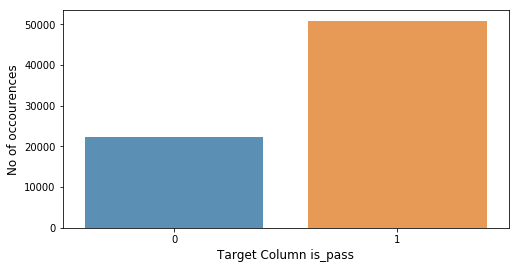

In [9]:
cnt_srs = train_df['is_pass'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel("Target Column is_pass",fontsize = 12)
plt.show()

## Column Program ID Analysis



 Distribution of training set data 




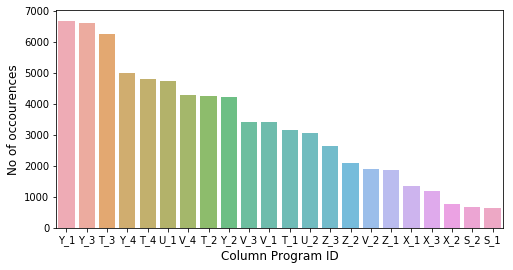



 Distribution of test set data 




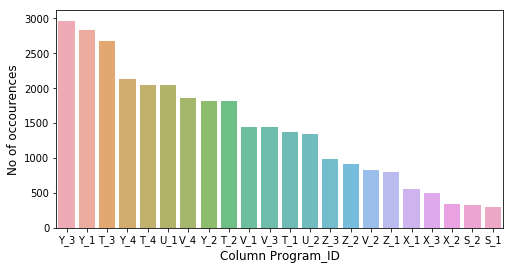

In [10]:
t = train_df['program_id']
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['program_id'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column Program ID',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['program_id'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column Program_ID',fontsize = 12)
plt.show()

So there are many categorical variables. now let's look at the count of these variables in training set and test set. 

In [11]:
print(len(train_df['program_id'].unique()))
print(len(test_df['program_id'].unique()))

22
22


 Both have same no of categorical variables. Now let's do the one-hot encoding with these variables and move onto next one.  

In [12]:
# train_df = pd.get_dummies(train_df,prefix = ['program_id'])
# test_df = pd.get_dummies(test_df,prefix = ['program_id'])

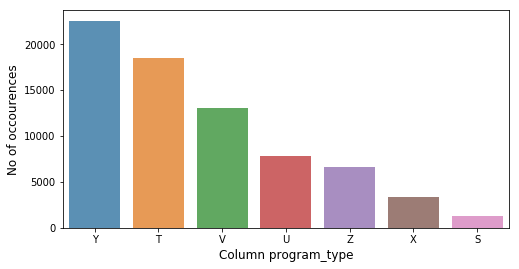



 Distribution of test set data 




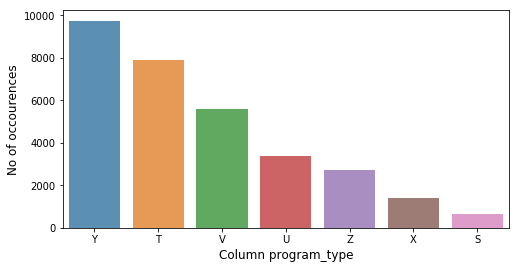

In [13]:
cnt_srs = train_df['program_type'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column program_type',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['program_type'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column program_type',fontsize = 12)
plt.show()

Again many categorical values but have same distribution across training and test set.

## Column Program Duration 



 Distribution of training set data 




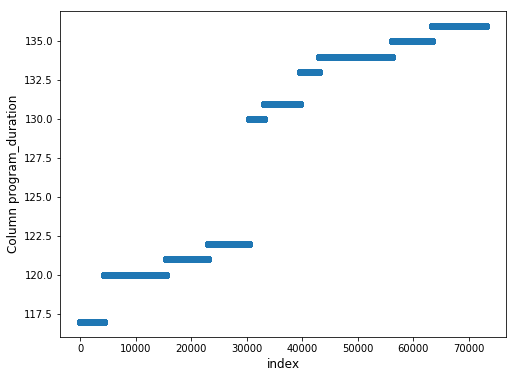



 Distribution of test set data 




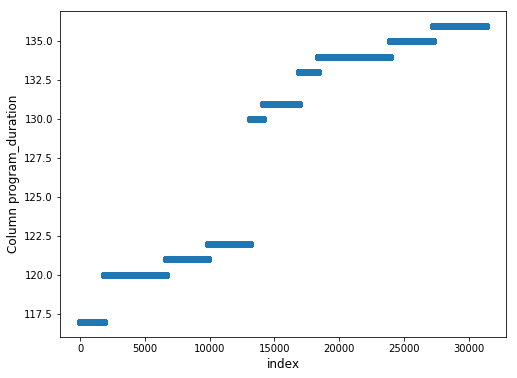

In [14]:
print("\n\n Distribution of training set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.program_duration.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column program_duration', fontsize=12)
plt.show()

print("\n\n Distribution of test set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(test_df.shape[0]), np.sort(test_df.program_duration.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column program_duration', fontsize=12)
plt.show()

Nice ditsribution kind of categorical also.

In [16]:
len(train_df.test_id.unique())==len(test_df.test_id.unique())

True

## Column test type



 Distribution of training set data 




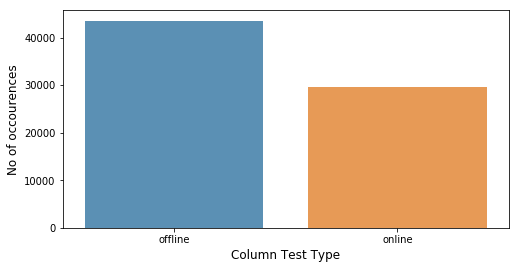



 Distribution of test set data 




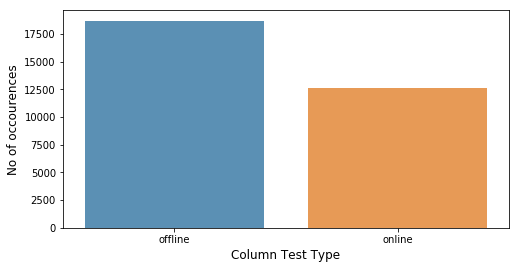

In [18]:
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['test_type'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column Test Type',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['test_type'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column Test Type',fontsize = 12)
plt.show()

## Column difficulty level



 Distribution of training set data 




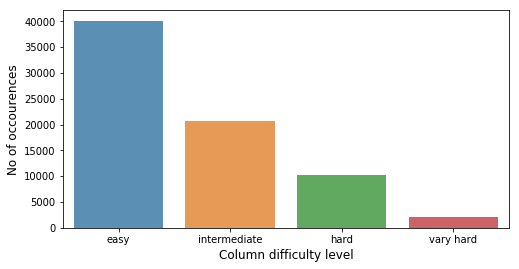



 Distribution of test set data 




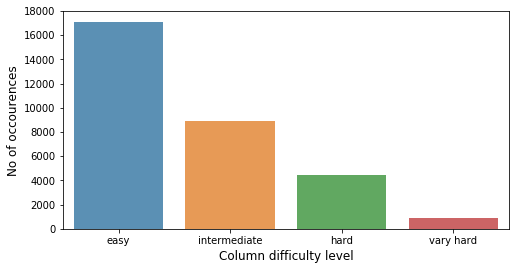

In [19]:
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['difficulty_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column difficulty level',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['difficulty_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column difficulty level',fontsize = 12)
plt.show()

## Column Gender



 Distribution of training set data 




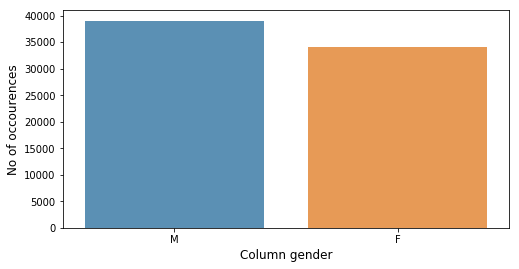



 Distribution of test set data 




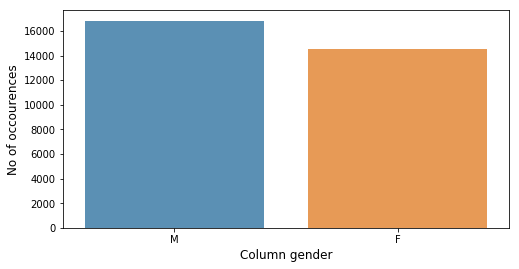

In [21]:
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['gender'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column gender',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['gender'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column gender',fontsize = 12)
plt.show()

## Column Education 



 Distribution of training set data 




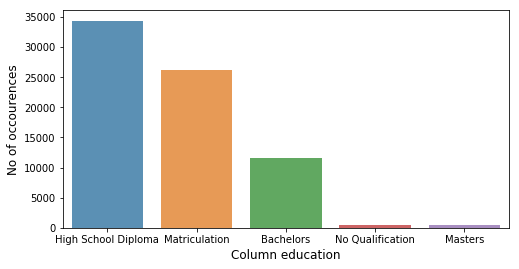



 Distribution of test set data 




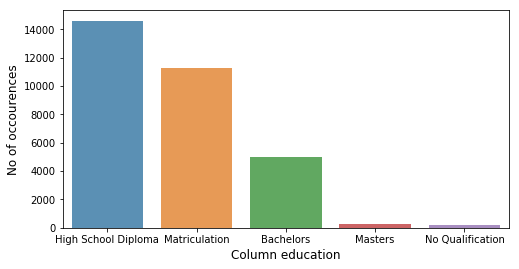

In [22]:
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['education'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column education',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['education'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column education',fontsize = 12)
plt.show()

## Column City Tier



 Distribution of training set data 




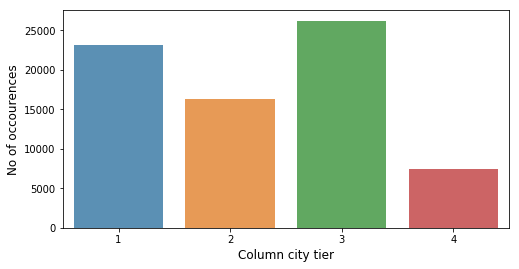



 Distribution of test set data 




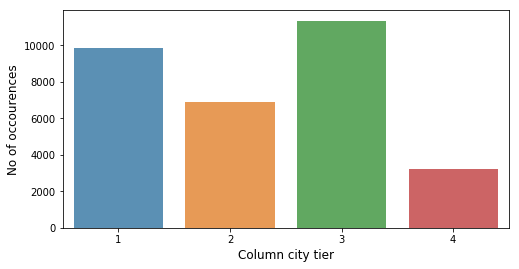

In [23]:
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['city_tier'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column city tier',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['city_tier'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column city tier',fontsize = 12)
plt.show()

In [24]:
train_df.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

## Column is_handicapped



 Distribution of training set data 




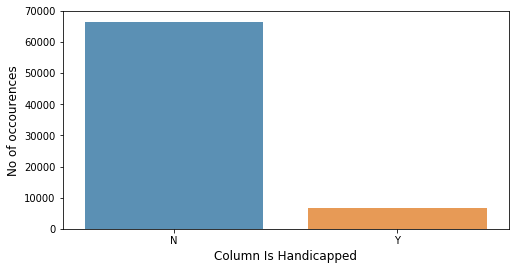



 Distribution of test set data 




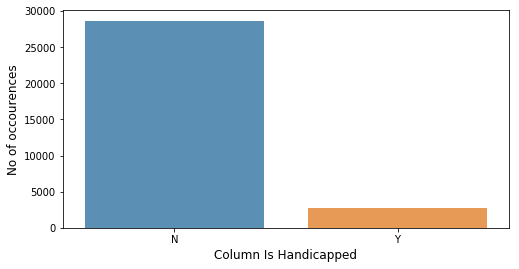

In [25]:
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['is_handicapped'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column Is Handicapped',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['is_handicapped'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column Is Handicapped',fontsize = 12)
plt.show()

In [26]:
tdf_copy = train_df
tstdf_copy = test_df

In [27]:
cols = ['program_id', 'program_type', 'test_id','test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier','is_handicapped']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    tdf_copy[x]=lbl.fit_transform(train_df[x])
    tstdf_copy[x]=lbl.fit_transform(test_df[x])
   

In [28]:
tdf_copy['trainee_engagement_rating'].fillna(1.0,inplace=True)
tstdf_copy['trainee_engagement_rating'].fillna(1.0,inplace=True)

In [29]:
tdf_copy.drop(['id','age'],axis=1,inplace=True)
tstdf_copy.drop(['id','age'],axis=1,inplace=True)

In [32]:
y = tdf_copy['is_pass'].values
X = tdf_copy.drop('is_pass',axis=1,inplace=True)
X = tdf_copy.values

### Logistic Regression

In [34]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Test = sc.fit_transform(test_df.values)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)
y_pred_sub = classifier.predict(Test)

#test_data = pd.read_csv('../input/test_2.csv')
#test_data['id'].values

#df = pd.DataFrame({'id':test_data['id'].values,'is_pass':y_pred_sub})
#filename = 'submissison_logistic_regression.csv'
#df.to_csv(filename, index=False,columns = ['id','is_pass'])

Accuracy:  0.7079289131920711
Precision:  0.1300997280145059
Recall : 0.5688800792864221


####  Above logistic Regression is giving leaderboard score of *0.546*. Now Let's try other algorithms and look at is it improving in this case.  

### XGBOOST

In [36]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate =0.1,n_estimators=500,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1,seed=27)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print(accuracies.mean())
print(accuracies.std())

# y_pred_sub = classifier.predict(test_df.values)
# test_data = pd.read_csv('../input/test_2.csv')
# test_data['id'].values

# df = pd.DataFrame({'id':test_data['id'].values,'is_pass':y_pred_sub})
# filename = 'submissison_XGBOOST.csv'
# df.to_csv(filename, index=False,columns = ['id','is_pass'])

[[1648 2764]
 [ 960 9258]]
0.7394432027388793
0.0036044798851200986


### Xgboost -

#### Parameters 
learning_rate=0.1,n_estimators=60,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
objective= 'binary:logistic',scale_pos_weight=1,seed=27 **Score : 0.6112**

#### Parameters 
learning_rate=0.5,n_estimators=60,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
objective= 'binary:logistic',scale_pos_weight=1,seed=27 **Score : 0.6211**

#### Parameters 
learning_rate=0.3,n_estimators=100,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
objective= 'binary:logistic',scale_pos_weight=1,seed=27 **Score : 0.6241**

#### Parameters 
learning_rate=0.1,n_estimators=100,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
objective= 'binary:logistic',scale_pos_weight=1,seed=27 **Score : 0.6112**

#### Parameters 
learning_rate=0.5,n_estimators=100,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
objective= 'binary:logistic',scale_pos_weight=1,seed=27 **Score : 0.622**

#### Parameters 
learning_rate=0.1,n_estimators=500,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
objective= 'binary:logistic',scale_pos_weight=1,seed=27 **Score : 0.629**

#### So It is not improving much even on the change of parameter. Let's try another algorithm.


### KNN

In [37]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# y_pred_sub = classifier.predict(Test)
# test_data = pd.read_csv('test_2.csv')
# test_data['id'].values

# df = pd.DataFrame({'id':test_data['id'].values,'is_pass':y_pred_sub})
# filename = 'submissison_KNN.csv'
# df.to_csv(filename, index=False,columns = ['id','is_pass'])

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)


[[ 2259  3259]
 [ 2281 10488]]
Accuracy:  0.6970525509925083
Precision:  0.40938745922435665
Recall : 0.49757709251101323


### KNN -

####  Parameters
n_neighbors = 5, metric = 'minkowski', p = 2 **Score : 0.6121**

####  Parameters
n_neighbors = 10, metric = 'minkowski', p = 2 **Score : 0.618**

So It is not improving much even on the change of parameter. Let's try another algorithm.

## SVM

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# y_pred_sub = classifier.predict(Test)
# test_data = pd.read_csv('test_2.csv')
# test_data['id'].values

# df = pd.DataFrame({'id':test_data['id'].values,'is_pass':y_pred_sub})
# filename = 'submissison_SVM.csv'
# df.to_csv(filename, index=False,columns = ['id','is_pass'])

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)


[[    0  5518]
 [    0 12769]]
Accuracy:  0.6982555914037294
Precision:  0.0
Recall : nan


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars


### SVM

#### Parameters :
kernel = 'linear', random_state = 0 **Score : 0.5 **

Very poor performance compared to other algorithms. Now let's try decision trees or random forest. Otherwise we need to do the feature engineering

### Decision Trees

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# y_pred_sub = classifier.predict(Test)
# test_data = pd.read_csv('test_2.csv')
# test_data['id'].values

# df = pd.DataFrame({'id':test_data['id'].values,'is_pass':y_pred_sub})
# filename = 'submissison_DEcision_Tree.csv'
# df.to_csv(filename, index=False,columns = ['id','is_pass'])

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)


[[2877 2641]
 [2888 9881]]
Accuracy:  0.6976540711981188
Precision:  0.5213845596230519
Recall : 0.4990459670424978


### Decision Trees

#### Parameters : Default
Score : 0.6311, Rank : 126

#### Parameters :
criterion = 'gini', random_state = 0 **Score : 0.6238 **

**So all the algorithms are stopping at a point near 0.63. Let's try out somethong new **                                                                                                                                             
** Again redaing the input files as few of the columbns from that files are deleted, So we need them again**

In [41]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test_2.csv')
sample_df = pd.read_csv('../input/sample_submission.csv')

In [42]:
train_df['trainee_engagement_rating'].fillna(-1.0,inplace=True)
test_df['trainee_engagement_rating'].fillna(-1.0,inplace=True)

train_df['age'].fillna(train_df['age'].median(),inplace=True)
test_df['age'].fillna(train_df['age'].median(),inplace=True)

## CatBoost

In [43]:
from sklearn import cross_validation
def crossValidation(clf, X, Y):
    '''
        num: can be number of trees or nearest neighbours
    '''
    categorical_features_indices = list(np.where(X.dtypes != np.float)[0])
    X = X.values
    Y = Y.values
    cv = cross_validation.StratifiedKFold(Y, n_folds=10)
    for train, test in cv:
        X_train, y_train = X[train], Y[train]
        X_test, y_test = X[test], Y[test]
        clf.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=False)

X = train_df.drop(['is_pass'], axis=1)
#Test = test_df.drop(['age','id'], axis=1)
Test = test_df
y = train_df['is_pass']

from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=700, depth=6, learning_rate=0.1)
crossValidation(model,X,y)

y_pred_sub = model.predict_proba(Test.values)[:,1]
print(y_pred_sub)
test_data = pd.read_csv('../input/test_2.csv')
test_data['id'].values

df = pd.DataFrame({'id':test_data['id'].values,'is_pass':y_pred_sub})
filename = 'submissison_CATBOOST.csv'
df.to_csv(filename, index=False,columns = ['id','is_pass'])

0:	learn: 0.6640276	test: 0.6640203	best: 0.6640203 (0)	total: 404ms	remaining: 4m 42s
1:	learn: 0.6410766	test: 0.6410712	best: 0.6410712 (1)	total: 805ms	remaining: 4m 40s
2:	learn: 0.6145823	test: 0.6103595	best: 0.6103595 (2)	total: 1.11s	remaining: 4m 17s
3:	learn: 0.5932208	test: 0.5839198	best: 0.5839198 (3)	total: 1.41s	remaining: 4m 5s
4:	learn: 0.5761885	test: 0.5640652	best: 0.5640652 (4)	total: 1.8s	remaining: 4m 10s
5:	learn: 0.5625012	test: 0.5480798	best: 0.5480798 (5)	total: 2.11s	remaining: 4m 3s
6:	learn: 0.5516155	test: 0.5345080	best: 0.5345080 (6)	total: 2.5s	remaining: 4m 7s
7:	learn: 0.5427489	test: 0.5232168	best: 0.5232168 (7)	total: 2.71s	remaining: 3m 54s
8:	learn: 0.5360284	test: 0.5147420	best: 0.5147420 (8)	total: 3.01s	remaining: 3m 50s
9:	learn: 0.5302587	test: 0.5079564	best: 0.5079564 (9)	total: 3.4s	remaining: 3m 54s
10:	learn: 0.5257134	test: 0.5024742	best: 0.5024742 (10)	total: 3.71s	remaining: 3m 52s
11:	learn: 0.5221869	test: 0.4986435	best: 0.49

94:	learn: 0.4833105	test: 0.4601133	best: 0.4601133 (94)	total: 36.5s	remaining: 3m 52s
95:	learn: 0.4830900	test: 0.4599570	best: 0.4599570 (95)	total: 36.8s	remaining: 3m 51s
96:	learn: 0.4830354	test: 0.4599190	best: 0.4599190 (96)	total: 37.2s	remaining: 3m 51s
97:	learn: 0.4829723	test: 0.4599354	best: 0.4599190 (96)	total: 37.6s	remaining: 3m 50s
98:	learn: 0.4827953	test: 0.4597605	best: 0.4597605 (98)	total: 37.9s	remaining: 3m 49s
99:	learn: 0.4827305	test: 0.4597531	best: 0.4597531 (99)	total: 38.3s	remaining: 3m 49s
100:	learn: 0.4826870	test: 0.4597668	best: 0.4597531 (99)	total: 38.7s	remaining: 3m 49s
101:	learn: 0.4825499	test: 0.4595880	best: 0.4595880 (101)	total: 39.1s	remaining: 3m 49s
102:	learn: 0.4825106	test: 0.4595592	best: 0.4595592 (102)	total: 39.4s	remaining: 3m 48s
103:	learn: 0.4824421	test: 0.4594970	best: 0.4594970 (103)	total: 39.8s	remaining: 3m 47s
104:	learn: 0.4823130	test: 0.4594992	best: 0.4594970 (103)	total: 40.3s	remaining: 3m 48s
105:	learn: 

185:	learn: 0.4755430	test: 0.4572802	best: 0.4572552 (183)	total: 1m 12s	remaining: 3m 21s
186:	learn: 0.4754083	test: 0.4573040	best: 0.4572552 (183)	total: 1m 13s	remaining: 3m 20s
187:	learn: 0.4753211	test: 0.4572624	best: 0.4572552 (183)	total: 1m 13s	remaining: 3m 20s
188:	learn: 0.4752588	test: 0.4572282	best: 0.4572282 (188)	total: 1m 13s	remaining: 3m 19s
189:	learn: 0.4751845	test: 0.4571705	best: 0.4571705 (189)	total: 1m 14s	remaining: 3m 19s
190:	learn: 0.4751589	test: 0.4571777	best: 0.4571705 (189)	total: 1m 14s	remaining: 3m 18s
191:	learn: 0.4751164	test: 0.4571752	best: 0.4571705 (189)	total: 1m 15s	remaining: 3m 18s
192:	learn: 0.4750716	test: 0.4571646	best: 0.4571646 (192)	total: 1m 15s	remaining: 3m 18s
193:	learn: 0.4749852	test: 0.4571715	best: 0.4571646 (192)	total: 1m 15s	remaining: 3m 17s
194:	learn: 0.4749289	test: 0.4571530	best: 0.4571530 (194)	total: 1m 16s	remaining: 3m 17s
195:	learn: 0.4748813	test: 0.4571721	best: 0.4571530 (194)	total: 1m 16s	remain

275:	learn: 0.4696168	test: 0.4560755	best: 0.4560755 (275)	total: 1m 48s	remaining: 2m 45s
276:	learn: 0.4695893	test: 0.4560887	best: 0.4560755 (275)	total: 1m 48s	remaining: 2m 45s
277:	learn: 0.4695109	test: 0.4560866	best: 0.4560755 (275)	total: 1m 48s	remaining: 2m 45s
278:	learn: 0.4694300	test: 0.4560706	best: 0.4560706 (278)	total: 1m 49s	remaining: 2m 44s
279:	learn: 0.4693591	test: 0.4560435	best: 0.4560435 (279)	total: 1m 49s	remaining: 2m 44s
280:	learn: 0.4693007	test: 0.4560147	best: 0.4560147 (280)	total: 1m 50s	remaining: 2m 44s
281:	learn: 0.4692583	test: 0.4559903	best: 0.4559903 (281)	total: 1m 50s	remaining: 2m 43s
282:	learn: 0.4692050	test: 0.4559674	best: 0.4559674 (282)	total: 1m 50s	remaining: 2m 43s
283:	learn: 0.4691577	test: 0.4559874	best: 0.4559674 (282)	total: 1m 51s	remaining: 2m 43s
284:	learn: 0.4690991	test: 0.4560210	best: 0.4559674 (282)	total: 1m 51s	remaining: 2m 42s
285:	learn: 0.4690398	test: 0.4560149	best: 0.4559674 (282)	total: 1m 52s	remain

365:	learn: 0.4642118	test: 0.4550593	best: 0.4550230 (348)	total: 2m 22s	remaining: 2m 10s
366:	learn: 0.4641735	test: 0.4550260	best: 0.4550230 (348)	total: 2m 23s	remaining: 2m 10s
367:	learn: 0.4641174	test: 0.4549338	best: 0.4549338 (367)	total: 2m 23s	remaining: 2m 9s
368:	learn: 0.4640559	test: 0.4549155	best: 0.4549155 (368)	total: 2m 24s	remaining: 2m 9s
369:	learn: 0.4639884	test: 0.4548976	best: 0.4548976 (369)	total: 2m 24s	remaining: 2m 8s
370:	learn: 0.4639143	test: 0.4548852	best: 0.4548852 (370)	total: 2m 24s	remaining: 2m 8s
371:	learn: 0.4638873	test: 0.4548722	best: 0.4548722 (371)	total: 2m 25s	remaining: 2m 7s
372:	learn: 0.4638453	test: 0.4548250	best: 0.4548250 (372)	total: 2m 25s	remaining: 2m 7s
373:	learn: 0.4638237	test: 0.4548225	best: 0.4548225 (373)	total: 2m 25s	remaining: 2m 7s
374:	learn: 0.4637521	test: 0.4548340	best: 0.4548225 (373)	total: 2m 26s	remaining: 2m 6s
375:	learn: 0.4637080	test: 0.4548438	best: 0.4548225 (373)	total: 2m 26s	remaining: 2m 

455:	learn: 0.4589149	test: 0.4548721	best: 0.4546350 (390)	total: 2m 57s	remaining: 1m 34s
456:	learn: 0.4588088	test: 0.4548872	best: 0.4546350 (390)	total: 2m 57s	remaining: 1m 34s
457:	learn: 0.4587799	test: 0.4549154	best: 0.4546350 (390)	total: 2m 57s	remaining: 1m 34s
458:	learn: 0.4587148	test: 0.4548934	best: 0.4546350 (390)	total: 2m 58s	remaining: 1m 33s
459:	learn: 0.4586169	test: 0.4549141	best: 0.4546350 (390)	total: 2m 58s	remaining: 1m 33s
460:	learn: 0.4585476	test: 0.4550087	best: 0.4546350 (390)	total: 2m 59s	remaining: 1m 32s
461:	learn: 0.4585005	test: 0.4550524	best: 0.4546350 (390)	total: 2m 59s	remaining: 1m 32s
462:	learn: 0.4584326	test: 0.4550466	best: 0.4546350 (390)	total: 2m 59s	remaining: 1m 32s
463:	learn: 0.4583814	test: 0.4550049	best: 0.4546350 (390)	total: 3m	remaining: 1m 31s
464:	learn: 0.4583488	test: 0.4549974	best: 0.4546350 (390)	total: 3m	remaining: 1m 31s
465:	learn: 0.4582810	test: 0.4549407	best: 0.4546350 (390)	total: 3m 1s	remaining: 1m 3

545:	learn: 0.4541378	test: 0.4547140	best: 0.4546350 (390)	total: 3m 33s	remaining: 1m
546:	learn: 0.4541026	test: 0.4546907	best: 0.4546350 (390)	total: 3m 33s	remaining: 59.7s
547:	learn: 0.4540926	test: 0.4546835	best: 0.4546350 (390)	total: 3m 33s	remaining: 59.3s
548:	learn: 0.4540507	test: 0.4546801	best: 0.4546350 (390)	total: 3m 34s	remaining: 58.9s
549:	learn: 0.4539922	test: 0.4546130	best: 0.4546130 (549)	total: 3m 34s	remaining: 58.5s
550:	learn: 0.4539361	test: 0.4546179	best: 0.4546130 (549)	total: 3m 35s	remaining: 58.1s
551:	learn: 0.4539055	test: 0.4546488	best: 0.4546130 (549)	total: 3m 35s	remaining: 57.7s
552:	learn: 0.4538613	test: 0.4546073	best: 0.4546073 (552)	total: 3m 35s	remaining: 57.3s
553:	learn: 0.4538170	test: 0.4545891	best: 0.4545891 (553)	total: 3m 36s	remaining: 57s
554:	learn: 0.4537766	test: 0.4546227	best: 0.4545891 (553)	total: 3m 36s	remaining: 56.6s
555:	learn: 0.4537274	test: 0.4546454	best: 0.4545891 (553)	total: 3m 36s	remaining: 56.2s
556:

636:	learn: 0.4496829	test: 0.4549827	best: 0.4543376 (591)	total: 4m 7s	remaining: 24.5s
637:	learn: 0.4496247	test: 0.4549799	best: 0.4543376 (591)	total: 4m 8s	remaining: 24.1s
638:	learn: 0.4495867	test: 0.4549814	best: 0.4543376 (591)	total: 4m 8s	remaining: 23.7s
639:	learn: 0.4495682	test: 0.4549916	best: 0.4543376 (591)	total: 4m 9s	remaining: 23.4s
640:	learn: 0.4495332	test: 0.4549842	best: 0.4543376 (591)	total: 4m 9s	remaining: 23s
641:	learn: 0.4494769	test: 0.4549938	best: 0.4543376 (591)	total: 4m 9s	remaining: 22.6s
642:	learn: 0.4493948	test: 0.4550094	best: 0.4543376 (591)	total: 4m 10s	remaining: 22.2s
643:	learn: 0.4493331	test: 0.4550115	best: 0.4543376 (591)	total: 4m 10s	remaining: 21.8s
644:	learn: 0.4493005	test: 0.4550527	best: 0.4543376 (591)	total: 4m 11s	remaining: 21.4s
645:	learn: 0.4492326	test: 0.4550908	best: 0.4543376 (591)	total: 4m 11s	remaining: 21s
646:	learn: 0.4491963	test: 0.4550738	best: 0.4543376 (591)	total: 4m 11s	remaining: 20.6s
647:	lear

27:	learn: 0.4994154	test: 0.4691055	best: 0.4691055 (27)	total: 10s	remaining: 4m
28:	learn: 0.4988898	test: 0.4684174	best: 0.4684174 (28)	total: 10.4s	remaining: 4m 1s
29:	learn: 0.4985141	test: 0.4681287	best: 0.4681287 (29)	total: 10.8s	remaining: 4m 1s
30:	learn: 0.4980503	test: 0.4677262	best: 0.4677262 (30)	total: 11.2s	remaining: 4m 2s
31:	learn: 0.4976227	test: 0.4670147	best: 0.4670147 (31)	total: 11.7s	remaining: 4m 4s
32:	learn: 0.4970792	test: 0.4665998	best: 0.4665998 (32)	total: 12.1s	remaining: 4m 4s
33:	learn: 0.4967487	test: 0.4662296	best: 0.4662296 (33)	total: 12.6s	remaining: 4m 7s
34:	learn: 0.4961411	test: 0.4657709	best: 0.4657709 (34)	total: 12.9s	remaining: 4m 5s
35:	learn: 0.4957478	test: 0.4652692	best: 0.4652692 (35)	total: 13.3s	remaining: 4m 5s
36:	learn: 0.4952211	test: 0.4647173	best: 0.4647173 (36)	total: 13.7s	remaining: 4m 5s
37:	learn: 0.4948519	test: 0.4644642	best: 0.4644642 (37)	total: 14.1s	remaining: 4m 5s
38:	learn: 0.4945699	test: 0.4641346	

120:	learn: 0.4809626	test: 0.4552471	best: 0.4552471 (120)	total: 46.8s	remaining: 3m 43s
121:	learn: 0.4809053	test: 0.4552141	best: 0.4552141 (121)	total: 47.2s	remaining: 3m 43s
122:	learn: 0.4808053	test: 0.4552031	best: 0.4552031 (122)	total: 47.6s	remaining: 3m 43s
123:	learn: 0.4807071	test: 0.4551967	best: 0.4551967 (123)	total: 47.9s	remaining: 3m 42s
124:	learn: 0.4805910	test: 0.4551621	best: 0.4551621 (124)	total: 48.4s	remaining: 3m 42s
125:	learn: 0.4804841	test: 0.4551558	best: 0.4551558 (125)	total: 48.8s	remaining: 3m 42s
126:	learn: 0.4803860	test: 0.4550655	best: 0.4550655 (126)	total: 49.2s	remaining: 3m 41s
127:	learn: 0.4803294	test: 0.4550795	best: 0.4550655 (126)	total: 49.7s	remaining: 3m 42s
128:	learn: 0.4802248	test: 0.4550742	best: 0.4550655 (126)	total: 50s	remaining: 3m 41s
129:	learn: 0.4800311	test: 0.4550443	best: 0.4550443 (129)	total: 50.4s	remaining: 3m 40s
130:	learn: 0.4799475	test: 0.4549081	best: 0.4549081 (130)	total: 50.8s	remaining: 3m 40s
1

210:	learn: 0.4741013	test: 0.4528449	best: 0.4528449 (210)	total: 1m 22s	remaining: 3m 10s
211:	learn: 0.4740725	test: 0.4528440	best: 0.4528440 (211)	total: 1m 22s	remaining: 3m 10s
212:	learn: 0.4739526	test: 0.4527690	best: 0.4527690 (212)	total: 1m 23s	remaining: 3m 9s
213:	learn: 0.4738718	test: 0.4527803	best: 0.4527690 (212)	total: 1m 23s	remaining: 3m 9s
214:	learn: 0.4737775	test: 0.4528047	best: 0.4527690 (212)	total: 1m 23s	remaining: 3m 8s
215:	learn: 0.4737220	test: 0.4527919	best: 0.4527690 (212)	total: 1m 24s	remaining: 3m 8s
216:	learn: 0.4735636	test: 0.4526635	best: 0.4526635 (216)	total: 1m 24s	remaining: 3m 8s
217:	learn: 0.4734696	test: 0.4526011	best: 0.4526011 (217)	total: 1m 24s	remaining: 3m 7s
218:	learn: 0.4734393	test: 0.4525752	best: 0.4525752 (218)	total: 1m 25s	remaining: 3m 7s
219:	learn: 0.4733194	test: 0.4525612	best: 0.4525612 (219)	total: 1m 25s	remaining: 3m 6s
220:	learn: 0.4732614	test: 0.4525493	best: 0.4525493 (220)	total: 1m 26s	remaining: 3m 

300:	learn: 0.4684917	test: 0.4514402	best: 0.4514295 (295)	total: 1m 57s	remaining: 2m 35s
301:	learn: 0.4684645	test: 0.4514261	best: 0.4514261 (301)	total: 1m 57s	remaining: 2m 35s
302:	learn: 0.4683793	test: 0.4514429	best: 0.4514261 (301)	total: 1m 58s	remaining: 2m 34s
303:	learn: 0.4682764	test: 0.4514638	best: 0.4514261 (301)	total: 1m 58s	remaining: 2m 34s
304:	learn: 0.4681449	test: 0.4514815	best: 0.4514261 (301)	total: 1m 59s	remaining: 2m 34s
305:	learn: 0.4681017	test: 0.4514736	best: 0.4514261 (301)	total: 1m 59s	remaining: 2m 33s
306:	learn: 0.4680475	test: 0.4514273	best: 0.4514261 (301)	total: 1m 59s	remaining: 2m 33s
307:	learn: 0.4680079	test: 0.4514379	best: 0.4514261 (301)	total: 2m	remaining: 2m 33s
308:	learn: 0.4679605	test: 0.4514362	best: 0.4514261 (301)	total: 2m	remaining: 2m 32s
309:	learn: 0.4679525	test: 0.4514314	best: 0.4514261 (301)	total: 2m 1s	remaining: 2m 32s
310:	learn: 0.4678766	test: 0.4514190	best: 0.4514190 (310)	total: 2m 1s	remaining: 2m 31

390:	learn: 0.4629959	test: 0.4506184	best: 0.4505732 (387)	total: 2m 32s	remaining: 2m
391:	learn: 0.4629189	test: 0.4505798	best: 0.4505732 (387)	total: 2m 33s	remaining: 2m
392:	learn: 0.4628424	test: 0.4505996	best: 0.4505732 (387)	total: 2m 33s	remaining: 1m 59s
393:	learn: 0.4628118	test: 0.4506011	best: 0.4505732 (387)	total: 2m 33s	remaining: 1m 59s
394:	learn: 0.4627607	test: 0.4505890	best: 0.4505732 (387)	total: 2m 34s	remaining: 1m 59s
395:	learn: 0.4627139	test: 0.4505685	best: 0.4505685 (395)	total: 2m 34s	remaining: 1m 58s
396:	learn: 0.4626589	test: 0.4505744	best: 0.4505685 (395)	total: 2m 35s	remaining: 1m 58s
397:	learn: 0.4625891	test: 0.4505688	best: 0.4505685 (395)	total: 2m 35s	remaining: 1m 58s
398:	learn: 0.4625117	test: 0.4506683	best: 0.4505685 (395)	total: 2m 35s	remaining: 1m 57s
399:	learn: 0.4624694	test: 0.4506485	best: 0.4505685 (395)	total: 2m 36s	remaining: 1m 57s
400:	learn: 0.4624279	test: 0.4506455	best: 0.4505685 (395)	total: 2m 36s	remaining: 1m 

480:	learn: 0.4581706	test: 0.4505298	best: 0.4505298 (480)	total: 3m 8s	remaining: 1m 25s
481:	learn: 0.4581435	test: 0.4505294	best: 0.4505294 (481)	total: 3m 9s	remaining: 1m 25s
482:	learn: 0.4581095	test: 0.4505042	best: 0.4505042 (482)	total: 3m 9s	remaining: 1m 25s
483:	learn: 0.4580772	test: 0.4505121	best: 0.4505042 (482)	total: 3m 9s	remaining: 1m 24s
484:	learn: 0.4580715	test: 0.4505058	best: 0.4505042 (482)	total: 3m 10s	remaining: 1m 24s
485:	learn: 0.4580186	test: 0.4505253	best: 0.4505042 (482)	total: 3m 10s	remaining: 1m 24s
486:	learn: 0.4580079	test: 0.4505299	best: 0.4505042 (482)	total: 3m 11s	remaining: 1m 23s
487:	learn: 0.4579550	test: 0.4506016	best: 0.4505042 (482)	total: 3m 11s	remaining: 1m 23s
488:	learn: 0.4578964	test: 0.4505981	best: 0.4505042 (482)	total: 3m 11s	remaining: 1m 22s
489:	learn: 0.4578525	test: 0.4506149	best: 0.4505042 (482)	total: 3m 12s	remaining: 1m 22s
490:	learn: 0.4577452	test: 0.4506625	best: 0.4505042 (482)	total: 3m 12s	remaining:

570:	learn: 0.4536865	test: 0.4506805	best: 0.4503545 (536)	total: 3m 44s	remaining: 50.7s
571:	learn: 0.4536490	test: 0.4506671	best: 0.4503545 (536)	total: 3m 44s	remaining: 50.3s
572:	learn: 0.4536258	test: 0.4506610	best: 0.4503545 (536)	total: 3m 45s	remaining: 49.9s
573:	learn: 0.4535626	test: 0.4506939	best: 0.4503545 (536)	total: 3m 45s	remaining: 49.6s
574:	learn: 0.4535381	test: 0.4506744	best: 0.4503545 (536)	total: 3m 46s	remaining: 49.2s
575:	learn: 0.4534840	test: 0.4506598	best: 0.4503545 (536)	total: 3m 46s	remaining: 48.8s
576:	learn: 0.4534328	test: 0.4506416	best: 0.4503545 (536)	total: 3m 46s	remaining: 48.4s
577:	learn: 0.4533326	test: 0.4506393	best: 0.4503545 (536)	total: 3m 47s	remaining: 48s
578:	learn: 0.4532619	test: 0.4506357	best: 0.4503545 (536)	total: 3m 47s	remaining: 47.6s
579:	learn: 0.4531932	test: 0.4505266	best: 0.4503545 (536)	total: 3m 48s	remaining: 47.2s
580:	learn: 0.4531193	test: 0.4505155	best: 0.4503545 (536)	total: 3m 48s	remaining: 46.9s
5

661:	learn: 0.4490229	test: 0.4503562	best: 0.4502750 (642)	total: 4m 21s	remaining: 15s
662:	learn: 0.4489892	test: 0.4503493	best: 0.4502750 (642)	total: 4m 21s	remaining: 14.6s
663:	learn: 0.4489311	test: 0.4503581	best: 0.4502750 (642)	total: 4m 22s	remaining: 14.2s
664:	learn: 0.4488722	test: 0.4503539	best: 0.4502750 (642)	total: 4m 22s	remaining: 13.8s
665:	learn: 0.4488129	test: 0.4503708	best: 0.4502750 (642)	total: 4m 23s	remaining: 13.4s
666:	learn: 0.4487856	test: 0.4503687	best: 0.4502750 (642)	total: 4m 23s	remaining: 13s
667:	learn: 0.4487492	test: 0.4503702	best: 0.4502750 (642)	total: 4m 23s	remaining: 12.6s
668:	learn: 0.4487053	test: 0.4503442	best: 0.4502750 (642)	total: 4m 24s	remaining: 12.2s
669:	learn: 0.4486270	test: 0.4503712	best: 0.4502750 (642)	total: 4m 24s	remaining: 11.9s
670:	learn: 0.4485261	test: 0.4503630	best: 0.4502750 (642)	total: 4m 25s	remaining: 11.5s
671:	learn: 0.4484868	test: 0.4503859	best: 0.4502750 (642)	total: 4m 25s	remaining: 11.1s
672

52:	learn: 0.4898621	test: 0.4589808	best: 0.4589808 (52)	total: 20.9s	remaining: 4m 15s
53:	learn: 0.4897301	test: 0.4589246	best: 0.4589246 (53)	total: 21.3s	remaining: 4m 15s
54:	learn: 0.4895901	test: 0.4588614	best: 0.4588614 (54)	total: 21.7s	remaining: 4m 14s
55:	learn: 0.4894444	test: 0.4585533	best: 0.4585533 (55)	total: 22.2s	remaining: 4m 15s
56:	learn: 0.4893112	test: 0.4584835	best: 0.4584835 (56)	total: 22.6s	remaining: 4m 15s
57:	learn: 0.4890415	test: 0.4583990	best: 0.4583990 (57)	total: 23s	remaining: 4m 14s
58:	learn: 0.4888517	test: 0.4583358	best: 0.4583358 (58)	total: 23.4s	remaining: 4m 14s
59:	learn: 0.4886156	test: 0.4582193	best: 0.4582193 (59)	total: 23.7s	remaining: 4m 13s
60:	learn: 0.4884068	test: 0.4580637	best: 0.4580637 (60)	total: 24.2s	remaining: 4m 13s
61:	learn: 0.4881487	test: 0.4576916	best: 0.4576916 (61)	total: 24.5s	remaining: 4m 12s
62:	learn: 0.4878993	test: 0.4575775	best: 0.4575775 (62)	total: 24.9s	remaining: 4m 11s
63:	learn: 0.4877420	te

144:	learn: 0.4787258	test: 0.4517353	best: 0.4517353 (144)	total: 59.3s	remaining: 3m 46s
145:	learn: 0.4786906	test: 0.4517637	best: 0.4517353 (144)	total: 59.6s	remaining: 3m 46s
146:	learn: 0.4785833	test: 0.4517280	best: 0.4517280 (146)	total: 1m	remaining: 3m 46s
147:	learn: 0.4784749	test: 0.4516758	best: 0.4516758 (147)	total: 1m	remaining: 3m 45s
148:	learn: 0.4784044	test: 0.4516514	best: 0.4516514 (148)	total: 1m	remaining: 3m 45s
149:	learn: 0.4783730	test: 0.4516455	best: 0.4516455 (149)	total: 1m 1s	remaining: 3m 45s
150:	learn: 0.4783355	test: 0.4516040	best: 0.4516040 (150)	total: 1m 1s	remaining: 3m 44s
151:	learn: 0.4783034	test: 0.4516245	best: 0.4516040 (150)	total: 1m 2s	remaining: 3m 44s
152:	learn: 0.4782289	test: 0.4516106	best: 0.4516040 (150)	total: 1m 2s	remaining: 3m 43s
153:	learn: 0.4781692	test: 0.4515833	best: 0.4515833 (153)	total: 1m 2s	remaining: 3m 43s
154:	learn: 0.4780845	test: 0.4515354	best: 0.4515354 (154)	total: 1m 3s	remaining: 3m 42s
155:	lea

234:	learn: 0.4723981	test: 0.4495536	best: 0.4495536 (234)	total: 1m 35s	remaining: 3m 9s
235:	learn: 0.4723716	test: 0.4495469	best: 0.4495469 (235)	total: 1m 36s	remaining: 3m 8s
236:	learn: 0.4723384	test: 0.4495705	best: 0.4495469 (235)	total: 1m 36s	remaining: 3m 8s
237:	learn: 0.4722602	test: 0.4495396	best: 0.4495396 (237)	total: 1m 36s	remaining: 3m 8s
238:	learn: 0.4722040	test: 0.4495434	best: 0.4495396 (237)	total: 1m 37s	remaining: 3m 7s
239:	learn: 0.4721370	test: 0.4495310	best: 0.4495310 (239)	total: 1m 37s	remaining: 3m 7s
240:	learn: 0.4720873	test: 0.4495560	best: 0.4495310 (239)	total: 1m 38s	remaining: 3m 6s
241:	learn: 0.4720065	test: 0.4495721	best: 0.4495310 (239)	total: 1m 38s	remaining: 3m 6s
242:	learn: 0.4719553	test: 0.4495208	best: 0.4495208 (242)	total: 1m 38s	remaining: 3m 5s
243:	learn: 0.4719145	test: 0.4495085	best: 0.4495085 (243)	total: 1m 39s	remaining: 3m 5s
244:	learn: 0.4718863	test: 0.4494967	best: 0.4494967 (244)	total: 1m 39s	remaining: 3m 5s

324:	learn: 0.4672294	test: 0.4488430	best: 0.4488320 (323)	total: 2m 14s	remaining: 2m 34s
325:	learn: 0.4671791	test: 0.4488271	best: 0.4488271 (325)	total: 2m 14s	remaining: 2m 34s
326:	learn: 0.4670949	test: 0.4487704	best: 0.4487704 (326)	total: 2m 14s	remaining: 2m 33s
327:	learn: 0.4670852	test: 0.4487824	best: 0.4487704 (326)	total: 2m 15s	remaining: 2m 33s
328:	learn: 0.4670390	test: 0.4487789	best: 0.4487704 (326)	total: 2m 15s	remaining: 2m 33s
329:	learn: 0.4669697	test: 0.4487951	best: 0.4487704 (326)	total: 2m 16s	remaining: 2m 32s
330:	learn: 0.4668632	test: 0.4487448	best: 0.4487448 (330)	total: 2m 16s	remaining: 2m 32s
331:	learn: 0.4667946	test: 0.4487208	best: 0.4487208 (331)	total: 2m 16s	remaining: 2m 31s
332:	learn: 0.4667507	test: 0.4487197	best: 0.4487197 (332)	total: 2m 17s	remaining: 2m 31s
333:	learn: 0.4667173	test: 0.4487206	best: 0.4487197 (332)	total: 2m 17s	remaining: 2m 31s
334:	learn: 0.4666316	test: 0.4486964	best: 0.4486964 (334)	total: 2m 18s	remain

414:	learn: 0.4619469	test: 0.4485859	best: 0.4484913 (395)	total: 2m 51s	remaining: 1m 57s
415:	learn: 0.4619046	test: 0.4485776	best: 0.4484913 (395)	total: 2m 51s	remaining: 1m 57s
416:	learn: 0.4618682	test: 0.4485716	best: 0.4484913 (395)	total: 2m 51s	remaining: 1m 56s
417:	learn: 0.4618466	test: 0.4485706	best: 0.4484913 (395)	total: 2m 52s	remaining: 1m 56s
418:	learn: 0.4618153	test: 0.4485831	best: 0.4484913 (395)	total: 2m 52s	remaining: 1m 55s
419:	learn: 0.4617402	test: 0.4485694	best: 0.4484913 (395)	total: 2m 53s	remaining: 1m 55s
420:	learn: 0.4617261	test: 0.4485612	best: 0.4484913 (395)	total: 2m 53s	remaining: 1m 55s
421:	learn: 0.4616922	test: 0.4485492	best: 0.4484913 (395)	total: 2m 54s	remaining: 1m 54s
422:	learn: 0.4615992	test: 0.4485078	best: 0.4484913 (395)	total: 2m 54s	remaining: 1m 54s
423:	learn: 0.4615494	test: 0.4485329	best: 0.4484913 (395)	total: 2m 55s	remaining: 1m 53s
424:	learn: 0.4614902	test: 0.4485099	best: 0.4484913 (395)	total: 2m 55s	remain

504:	learn: 0.4570128	test: 0.4477154	best: 0.4477154 (504)	total: 3m 29s	remaining: 1m 20s
505:	learn: 0.4569575	test: 0.4476978	best: 0.4476978 (505)	total: 3m 29s	remaining: 1m 20s
506:	learn: 0.4568971	test: 0.4476710	best: 0.4476710 (506)	total: 3m 29s	remaining: 1m 19s
507:	learn: 0.4568330	test: 0.4476714	best: 0.4476710 (506)	total: 3m 30s	remaining: 1m 19s
508:	learn: 0.4567984	test: 0.4476562	best: 0.4476562 (508)	total: 3m 30s	remaining: 1m 19s
509:	learn: 0.4567505	test: 0.4476741	best: 0.4476562 (508)	total: 3m 31s	remaining: 1m 18s
510:	learn: 0.4566971	test: 0.4476810	best: 0.4476562 (508)	total: 3m 31s	remaining: 1m 18s
511:	learn: 0.4566746	test: 0.4476796	best: 0.4476562 (508)	total: 3m 31s	remaining: 1m 17s
512:	learn: 0.4565961	test: 0.4476811	best: 0.4476562 (508)	total: 3m 32s	remaining: 1m 17s
513:	learn: 0.4565252	test: 0.4476809	best: 0.4476562 (508)	total: 3m 32s	remaining: 1m 16s
514:	learn: 0.4564818	test: 0.4476621	best: 0.4476562 (508)	total: 3m 32s	remain

595:	learn: 0.4523084	test: 0.4472869	best: 0.4472869 (595)	total: 4m 5s	remaining: 42.8s
596:	learn: 0.4522451	test: 0.4472414	best: 0.4472414 (596)	total: 4m 5s	remaining: 42.4s
597:	learn: 0.4522150	test: 0.4472543	best: 0.4472414 (596)	total: 4m 6s	remaining: 42s
598:	learn: 0.4521971	test: 0.4472937	best: 0.4472414 (596)	total: 4m 6s	remaining: 41.6s
599:	learn: 0.4521229	test: 0.4472738	best: 0.4472414 (596)	total: 4m 7s	remaining: 41.2s
600:	learn: 0.4520807	test: 0.4472403	best: 0.4472403 (600)	total: 4m 7s	remaining: 40.8s
601:	learn: 0.4520191	test: 0.4472289	best: 0.4472289 (601)	total: 4m 7s	remaining: 40.4s
602:	learn: 0.4519755	test: 0.4471726	best: 0.4471726 (602)	total: 4m 8s	remaining: 40s
603:	learn: 0.4518846	test: 0.4471947	best: 0.4471726 (602)	total: 4m 8s	remaining: 39.5s
604:	learn: 0.4518511	test: 0.4471861	best: 0.4471726 (602)	total: 4m 9s	remaining: 39.1s
605:	learn: 0.4517849	test: 0.4471433	best: 0.4471433 (605)	total: 4m 9s	remaining: 38.7s
606:	learn: 0.

686:	learn: 0.4475468	test: 0.4472963	best: 0.4470629 (626)	total: 4m 41s	remaining: 5.33s
687:	learn: 0.4475188	test: 0.4473203	best: 0.4470629 (626)	total: 4m 42s	remaining: 4.92s
688:	learn: 0.4474861	test: 0.4473060	best: 0.4470629 (626)	total: 4m 42s	remaining: 4.51s
689:	learn: 0.4474615	test: 0.4473077	best: 0.4470629 (626)	total: 4m 43s	remaining: 4.1s
690:	learn: 0.4474037	test: 0.4472938	best: 0.4470629 (626)	total: 4m 43s	remaining: 3.69s
691:	learn: 0.4473768	test: 0.4472691	best: 0.4470629 (626)	total: 4m 43s	remaining: 3.28s
692:	learn: 0.4473354	test: 0.4472655	best: 0.4470629 (626)	total: 4m 44s	remaining: 2.87s
693:	learn: 0.4472907	test: 0.4472503	best: 0.4470629 (626)	total: 4m 44s	remaining: 2.46s
694:	learn: 0.4472159	test: 0.4473342	best: 0.4470629 (626)	total: 4m 45s	remaining: 2.05s
695:	learn: 0.4471724	test: 0.4473592	best: 0.4470629 (626)	total: 4m 45s	remaining: 1.64s
696:	learn: 0.4471003	test: 0.4474077	best: 0.4470629 (626)	total: 4m 45s	remaining: 1.23s


78:	learn: 0.4850054	test: 0.4545927	best: 0.4545927 (78)	total: 31.1s	remaining: 4m 4s
79:	learn: 0.4848773	test: 0.4544411	best: 0.4544411 (79)	total: 31.5s	remaining: 4m 4s
80:	learn: 0.4847723	test: 0.4543835	best: 0.4543835 (80)	total: 31.9s	remaining: 4m 3s
81:	learn: 0.4847106	test: 0.4543976	best: 0.4543835 (80)	total: 32.3s	remaining: 4m 3s
82:	learn: 0.4845732	test: 0.4543560	best: 0.4543560 (82)	total: 32.6s	remaining: 4m 2s
83:	learn: 0.4844629	test: 0.4542783	best: 0.4542783 (83)	total: 33s	remaining: 4m 2s
84:	learn: 0.4843942	test: 0.4542806	best: 0.4542783 (83)	total: 33.5s	remaining: 4m 2s
85:	learn: 0.4842572	test: 0.4542052	best: 0.4542052 (85)	total: 33.9s	remaining: 4m 2s
86:	learn: 0.4842060	test: 0.4542069	best: 0.4542052 (85)	total: 34.3s	remaining: 4m 1s
87:	learn: 0.4841207	test: 0.4542506	best: 0.4542052 (85)	total: 34.7s	remaining: 4m 1s
88:	learn: 0.4840729	test: 0.4542376	best: 0.4542052 (85)	total: 35.1s	remaining: 4m
89:	learn: 0.4839345	test: 0.4541872	

170:	learn: 0.4765006	test: 0.4511716	best: 0.4511716 (170)	total: 1m 8s	remaining: 3m 31s
171:	learn: 0.4764568	test: 0.4511809	best: 0.4511716 (170)	total: 1m 8s	remaining: 3m 31s
172:	learn: 0.4763777	test: 0.4511725	best: 0.4511716 (170)	total: 1m 9s	remaining: 3m 30s
173:	learn: 0.4763217	test: 0.4511685	best: 0.4511685 (173)	total: 1m 9s	remaining: 3m 30s
174:	learn: 0.4762724	test: 0.4511448	best: 0.4511448 (174)	total: 1m 9s	remaining: 3m 29s
175:	learn: 0.4762280	test: 0.4511587	best: 0.4511448 (174)	total: 1m 10s	remaining: 3m 29s
176:	learn: 0.4761193	test: 0.4511562	best: 0.4511448 (174)	total: 1m 10s	remaining: 3m 28s
177:	learn: 0.4760382	test: 0.4511851	best: 0.4511448 (174)	total: 1m 10s	remaining: 3m 28s
178:	learn: 0.4759658	test: 0.4511697	best: 0.4511448 (174)	total: 1m 11s	remaining: 3m 27s
179:	learn: 0.4758786	test: 0.4511582	best: 0.4511448 (174)	total: 1m 11s	remaining: 3m 27s
180:	learn: 0.4758344	test: 0.4511589	best: 0.4511448 (174)	total: 1m 12s	remaining: 

260:	learn: 0.4707367	test: 0.4498496	best: 0.4498243 (253)	total: 1m 44s	remaining: 2m 55s
261:	learn: 0.4706637	test: 0.4498802	best: 0.4498243 (253)	total: 1m 44s	remaining: 2m 55s
262:	learn: 0.4704979	test: 0.4496740	best: 0.4496740 (262)	total: 1m 45s	remaining: 2m 54s
263:	learn: 0.4704351	test: 0.4496849	best: 0.4496740 (262)	total: 1m 45s	remaining: 2m 54s
264:	learn: 0.4703884	test: 0.4496469	best: 0.4496469 (264)	total: 1m 45s	remaining: 2m 53s
265:	learn: 0.4703643	test: 0.4496493	best: 0.4496469 (264)	total: 1m 46s	remaining: 2m 53s
266:	learn: 0.4703088	test: 0.4496413	best: 0.4496413 (266)	total: 1m 46s	remaining: 2m 52s
267:	learn: 0.4702789	test: 0.4496468	best: 0.4496413 (266)	total: 1m 47s	remaining: 2m 52s
268:	learn: 0.4701871	test: 0.4496858	best: 0.4496413 (266)	total: 1m 47s	remaining: 2m 52s
269:	learn: 0.4701014	test: 0.4497060	best: 0.4496413 (266)	total: 1m 47s	remaining: 2m 51s
270:	learn: 0.4700748	test: 0.4496976	best: 0.4496413 (266)	total: 1m 48s	remain

350:	learn: 0.4654662	test: 0.4493974	best: 0.4493618 (339)	total: 2m 19s	remaining: 2m 18s
351:	learn: 0.4653877	test: 0.4493462	best: 0.4493462 (351)	total: 2m 19s	remaining: 2m 18s
352:	learn: 0.4652937	test: 0.4493263	best: 0.4493263 (352)	total: 2m 20s	remaining: 2m 17s
353:	learn: 0.4652743	test: 0.4493244	best: 0.4493244 (353)	total: 2m 20s	remaining: 2m 17s
354:	learn: 0.4652141	test: 0.4493302	best: 0.4493244 (353)	total: 2m 20s	remaining: 2m 17s
355:	learn: 0.4651020	test: 0.4492874	best: 0.4492874 (355)	total: 2m 21s	remaining: 2m 16s
356:	learn: 0.4650443	test: 0.4492809	best: 0.4492809 (356)	total: 2m 21s	remaining: 2m 16s
357:	learn: 0.4649742	test: 0.4492315	best: 0.4492315 (357)	total: 2m 22s	remaining: 2m 15s
358:	learn: 0.4648854	test: 0.4491960	best: 0.4491960 (358)	total: 2m 22s	remaining: 2m 15s
359:	learn: 0.4648547	test: 0.4492278	best: 0.4491960 (358)	total: 2m 22s	remaining: 2m 15s
360:	learn: 0.4648048	test: 0.4492309	best: 0.4491960 (358)	total: 2m 23s	remain

440:	learn: 0.4600964	test: 0.4485716	best: 0.4485429 (437)	total: 2m 55s	remaining: 1m 42s
441:	learn: 0.4600692	test: 0.4485863	best: 0.4485429 (437)	total: 2m 55s	remaining: 1m 42s
442:	learn: 0.4600231	test: 0.4485836	best: 0.4485429 (437)	total: 2m 55s	remaining: 1m 41s
443:	learn: 0.4599480	test: 0.4485623	best: 0.4485429 (437)	total: 2m 56s	remaining: 1m 41s
444:	learn: 0.4598952	test: 0.4485646	best: 0.4485429 (437)	total: 2m 56s	remaining: 1m 41s
445:	learn: 0.4598452	test: 0.4485732	best: 0.4485429 (437)	total: 2m 56s	remaining: 1m 40s
446:	learn: 0.4597512	test: 0.4486236	best: 0.4485429 (437)	total: 2m 57s	remaining: 1m 40s
447:	learn: 0.4596796	test: 0.4486126	best: 0.4485429 (437)	total: 2m 57s	remaining: 1m 39s
448:	learn: 0.4596492	test: 0.4486293	best: 0.4485429 (437)	total: 2m 58s	remaining: 1m 39s
449:	learn: 0.4596159	test: 0.4486370	best: 0.4485429 (437)	total: 2m 58s	remaining: 1m 39s
450:	learn: 0.4595839	test: 0.4486203	best: 0.4485429 (437)	total: 2m 58s	remain

530:	learn: 0.4552646	test: 0.4480050	best: 0.4480015 (527)	total: 3m 30s	remaining: 1m 6s
531:	learn: 0.4552240	test: 0.4480205	best: 0.4480015 (527)	total: 3m 30s	remaining: 1m 6s
532:	learn: 0.4551774	test: 0.4480329	best: 0.4480015 (527)	total: 3m 31s	remaining: 1m 6s
533:	learn: 0.4551150	test: 0.4480081	best: 0.4480015 (527)	total: 3m 31s	remaining: 1m 5s
534:	learn: 0.4550461	test: 0.4480486	best: 0.4480015 (527)	total: 3m 32s	remaining: 1m 5s
535:	learn: 0.4549818	test: 0.4480530	best: 0.4480015 (527)	total: 3m 32s	remaining: 1m 5s
536:	learn: 0.4549476	test: 0.4480704	best: 0.4480015 (527)	total: 3m 33s	remaining: 1m 4s
537:	learn: 0.4548595	test: 0.4479721	best: 0.4479721 (537)	total: 3m 33s	remaining: 1m 4s
538:	learn: 0.4548263	test: 0.4479385	best: 0.4479385 (538)	total: 3m 33s	remaining: 1m 3s
539:	learn: 0.4547892	test: 0.4479418	best: 0.4479385 (538)	total: 3m 34s	remaining: 1m 3s
540:	learn: 0.4547269	test: 0.4479153	best: 0.4479153 (540)	total: 3m 34s	remaining: 1m 3s

621:	learn: 0.4505444	test: 0.4478137	best: 0.4477487 (615)	total: 4m 5s	remaining: 30.8s
622:	learn: 0.4504753	test: 0.4477695	best: 0.4477487 (615)	total: 4m 6s	remaining: 30.4s
623:	learn: 0.4504592	test: 0.4477631	best: 0.4477487 (615)	total: 4m 6s	remaining: 30s
624:	learn: 0.4504287	test: 0.4477811	best: 0.4477487 (615)	total: 4m 6s	remaining: 29.6s
625:	learn: 0.4503663	test: 0.4478040	best: 0.4477487 (615)	total: 4m 7s	remaining: 29.2s
626:	learn: 0.4503001	test: 0.4477721	best: 0.4477487 (615)	total: 4m 7s	remaining: 28.9s
627:	learn: 0.4502275	test: 0.4478193	best: 0.4477487 (615)	total: 4m 8s	remaining: 28.5s
628:	learn: 0.4501606	test: 0.4478139	best: 0.4477487 (615)	total: 4m 8s	remaining: 28.1s
629:	learn: 0.4501371	test: 0.4477920	best: 0.4477487 (615)	total: 4m 9s	remaining: 27.7s
630:	learn: 0.4500861	test: 0.4478023	best: 0.4477487 (615)	total: 4m 9s	remaining: 27.3s
631:	learn: 0.4500474	test: 0.4477959	best: 0.4477487 (615)	total: 4m 9s	remaining: 26.9s
632:	learn: 

11:	learn: 0.5229376	test: 0.4946542	best: 0.4946542 (11)	total: 4.17s	remaining: 3m 59s
12:	learn: 0.5200678	test: 0.4914146	best: 0.4914146 (12)	total: 4.57s	remaining: 4m 1s
13:	learn: 0.5172661	test: 0.4881936	best: 0.4881936 (13)	total: 4.87s	remaining: 3m 58s
14:	learn: 0.5147931	test: 0.4849844	best: 0.4849844 (14)	total: 5.27s	remaining: 4m
15:	learn: 0.5129026	test: 0.4821468	best: 0.4821468 (15)	total: 5.57s	remaining: 3m 58s
16:	learn: 0.5111743	test: 0.4799362	best: 0.4799362 (16)	total: 5.87s	remaining: 3m 55s
17:	learn: 0.5100313	test: 0.4785151	best: 0.4785151 (17)	total: 6.28s	remaining: 3m 57s
18:	learn: 0.5085689	test: 0.4763174	best: 0.4763174 (18)	total: 6.67s	remaining: 3m 59s
19:	learn: 0.5072630	test: 0.4748977	best: 0.4748977 (19)	total: 6.97s	remaining: 3m 56s
20:	learn: 0.5061568	test: 0.4737813	best: 0.4737813 (20)	total: 7.28s	remaining: 3m 55s
21:	learn: 0.5047321	test: 0.4717333	best: 0.4717333 (21)	total: 7.67s	remaining: 3m 56s
22:	learn: 0.5035711	test:

104:	learn: 0.4826460	test: 0.4489678	best: 0.4489678 (104)	total: 40.4s	remaining: 3m 49s
105:	learn: 0.4825778	test: 0.4489537	best: 0.4489537 (105)	total: 40.7s	remaining: 3m 48s
106:	learn: 0.4823615	test: 0.4487901	best: 0.4487901 (106)	total: 41.1s	remaining: 3m 48s
107:	learn: 0.4822803	test: 0.4488119	best: 0.4487901 (106)	total: 41.6s	remaining: 3m 48s
108:	learn: 0.4820847	test: 0.4487163	best: 0.4487163 (108)	total: 42s	remaining: 3m 47s
109:	learn: 0.4820111	test: 0.4486586	best: 0.4486586 (109)	total: 42.4s	remaining: 3m 47s
110:	learn: 0.4819195	test: 0.4486461	best: 0.4486461 (110)	total: 42.7s	remaining: 3m 46s
111:	learn: 0.4818717	test: 0.4486232	best: 0.4486232 (111)	total: 43.1s	remaining: 3m 46s
112:	learn: 0.4817196	test: 0.4485217	best: 0.4485217 (112)	total: 43.5s	remaining: 3m 46s
113:	learn: 0.4815467	test: 0.4484510	best: 0.4484510 (113)	total: 43.8s	remaining: 3m 45s
114:	learn: 0.4814643	test: 0.4484719	best: 0.4484510 (113)	total: 44.2s	remaining: 3m 45s
1

195:	learn: 0.4754677	test: 0.4460667	best: 0.4460484 (194)	total: 1m 15s	remaining: 3m 13s
196:	learn: 0.4753232	test: 0.4458972	best: 0.4458972 (196)	total: 1m 15s	remaining: 3m 12s
197:	learn: 0.4752883	test: 0.4458939	best: 0.4458939 (197)	total: 1m 15s	remaining: 3m 12s
198:	learn: 0.4752411	test: 0.4458685	best: 0.4458685 (198)	total: 1m 16s	remaining: 3m 11s
199:	learn: 0.4751708	test: 0.4458029	best: 0.4458029 (199)	total: 1m 16s	remaining: 3m 11s
200:	learn: 0.4750849	test: 0.4457901	best: 0.4457901 (200)	total: 1m 16s	remaining: 3m 10s
201:	learn: 0.4750588	test: 0.4457614	best: 0.4457614 (201)	total: 1m 17s	remaining: 3m 10s
202:	learn: 0.4749773	test: 0.4457207	best: 0.4457207 (202)	total: 1m 17s	remaining: 3m 9s
203:	learn: 0.4749404	test: 0.4457394	best: 0.4457207 (202)	total: 1m 18s	remaining: 3m 9s
204:	learn: 0.4748460	test: 0.4456073	best: 0.4456073 (204)	total: 1m 18s	remaining: 3m 9s
205:	learn: 0.4748092	test: 0.4456270	best: 0.4456073 (204)	total: 1m 18s	remaining

285:	learn: 0.4700062	test: 0.4446700	best: 0.4446000 (284)	total: 1m 49s	remaining: 2m 38s
286:	learn: 0.4699321	test: 0.4446718	best: 0.4446000 (284)	total: 1m 50s	remaining: 2m 38s
287:	learn: 0.4698716	test: 0.4446712	best: 0.4446000 (284)	total: 1m 50s	remaining: 2m 38s
288:	learn: 0.4698092	test: 0.4446491	best: 0.4446000 (284)	total: 1m 50s	remaining: 2m 37s
289:	learn: 0.4697725	test: 0.4446153	best: 0.4446000 (284)	total: 1m 51s	remaining: 2m 37s
290:	learn: 0.4697305	test: 0.4446210	best: 0.4446000 (284)	total: 1m 51s	remaining: 2m 37s
291:	learn: 0.4697000	test: 0.4446161	best: 0.4446000 (284)	total: 1m 52s	remaining: 2m 36s
292:	learn: 0.4696543	test: 0.4446110	best: 0.4446000 (284)	total: 1m 52s	remaining: 2m 36s
293:	learn: 0.4695786	test: 0.4445716	best: 0.4445716 (293)	total: 1m 53s	remaining: 2m 36s
294:	learn: 0.4695067	test: 0.4445633	best: 0.4445633 (294)	total: 1m 53s	remaining: 2m 35s
295:	learn: 0.4694705	test: 0.4445826	best: 0.4445633 (294)	total: 1m 53s	remain

375:	learn: 0.4648098	test: 0.4441097	best: 0.4440107 (360)	total: 2m 25s	remaining: 2m 4s
376:	learn: 0.4647397	test: 0.4440847	best: 0.4440107 (360)	total: 2m 25s	remaining: 2m 4s
377:	learn: 0.4646446	test: 0.4441041	best: 0.4440107 (360)	total: 2m 25s	remaining: 2m 4s
378:	learn: 0.4645757	test: 0.4441670	best: 0.4440107 (360)	total: 2m 26s	remaining: 2m 3s
379:	learn: 0.4645103	test: 0.4441535	best: 0.4440107 (360)	total: 2m 26s	remaining: 2m 3s
380:	learn: 0.4644954	test: 0.4441603	best: 0.4440107 (360)	total: 2m 26s	remaining: 2m 3s
381:	learn: 0.4644734	test: 0.4441532	best: 0.4440107 (360)	total: 2m 27s	remaining: 2m 2s
382:	learn: 0.4644261	test: 0.4441624	best: 0.4440107 (360)	total: 2m 27s	remaining: 2m 2s
383:	learn: 0.4643712	test: 0.4441678	best: 0.4440107 (360)	total: 2m 28s	remaining: 2m 1s
384:	learn: 0.4643429	test: 0.4441755	best: 0.4440107 (360)	total: 2m 28s	remaining: 2m 1s
385:	learn: 0.4642766	test: 0.4442082	best: 0.4440107 (360)	total: 2m 28s	remaining: 2m 1s

465:	learn: 0.4600482	test: 0.4438071	best: 0.4437416 (459)	total: 3m	remaining: 1m 30s
466:	learn: 0.4599702	test: 0.4437479	best: 0.4437416 (459)	total: 3m	remaining: 1m 30s
467:	learn: 0.4599387	test: 0.4437667	best: 0.4437416 (459)	total: 3m	remaining: 1m 29s
468:	learn: 0.4598858	test: 0.4437794	best: 0.4437416 (459)	total: 3m 1s	remaining: 1m 29s
469:	learn: 0.4598139	test: 0.4437500	best: 0.4437416 (459)	total: 3m 1s	remaining: 1m 28s
470:	learn: 0.4598021	test: 0.4438085	best: 0.4437416 (459)	total: 3m 2s	remaining: 1m 28s
471:	learn: 0.4597727	test: 0.4438370	best: 0.4437416 (459)	total: 3m 2s	remaining: 1m 28s
472:	learn: 0.4597327	test: 0.4437923	best: 0.4437416 (459)	total: 3m 2s	remaining: 1m 27s
473:	learn: 0.4597143	test: 0.4437672	best: 0.4437416 (459)	total: 3m 3s	remaining: 1m 27s
474:	learn: 0.4596681	test: 0.4437549	best: 0.4437416 (459)	total: 3m 3s	remaining: 1m 27s
475:	learn: 0.4596212	test: 0.4437825	best: 0.4437416 (459)	total: 3m 4s	remaining: 1m 26s
476:	lea

555:	learn: 0.4551936	test: 0.4429507	best: 0.4429312 (554)	total: 3m 34s	remaining: 55.6s
556:	learn: 0.4551429	test: 0.4429248	best: 0.4429248 (556)	total: 3m 35s	remaining: 55.2s
557:	learn: 0.4550829	test: 0.4429141	best: 0.4429141 (557)	total: 3m 35s	remaining: 54.9s
558:	learn: 0.4550211	test: 0.4429078	best: 0.4429078 (558)	total: 3m 35s	remaining: 54.5s
559:	learn: 0.4549605	test: 0.4428776	best: 0.4428776 (559)	total: 3m 36s	remaining: 54.1s
560:	learn: 0.4548758	test: 0.4428727	best: 0.4428727 (560)	total: 3m 36s	remaining: 53.7s
561:	learn: 0.4548573	test: 0.4428918	best: 0.4428727 (560)	total: 3m 37s	remaining: 53.3s
562:	learn: 0.4548287	test: 0.4429230	best: 0.4428727 (560)	total: 3m 37s	remaining: 52.9s
563:	learn: 0.4547662	test: 0.4429193	best: 0.4428727 (560)	total: 3m 37s	remaining: 52.6s
564:	learn: 0.4546930	test: 0.4429133	best: 0.4428727 (560)	total: 3m 38s	remaining: 52.2s
565:	learn: 0.4546473	test: 0.4429598	best: 0.4428727 (560)	total: 3m 38s	remaining: 51.8s

646:	learn: 0.4509642	test: 0.4426964	best: 0.4425878 (617)	total: 4m 9s	remaining: 20.5s
647:	learn: 0.4509079	test: 0.4426876	best: 0.4425878 (617)	total: 4m 10s	remaining: 20.1s
648:	learn: 0.4508693	test: 0.4426729	best: 0.4425878 (617)	total: 4m 10s	remaining: 19.7s
649:	learn: 0.4508211	test: 0.4426502	best: 0.4425878 (617)	total: 4m 11s	remaining: 19.3s
650:	learn: 0.4507878	test: 0.4426290	best: 0.4425878 (617)	total: 4m 11s	remaining: 18.9s
651:	learn: 0.4507756	test: 0.4426237	best: 0.4425878 (617)	total: 4m 11s	remaining: 18.5s
652:	learn: 0.4507243	test: 0.4426077	best: 0.4425878 (617)	total: 4m 12s	remaining: 18.2s
653:	learn: 0.4506778	test: 0.4425948	best: 0.4425878 (617)	total: 4m 12s	remaining: 17.8s
654:	learn: 0.4506379	test: 0.4426441	best: 0.4425878 (617)	total: 4m 13s	remaining: 17.4s
655:	learn: 0.4506129	test: 0.4426589	best: 0.4425878 (617)	total: 4m 13s	remaining: 17s
656:	learn: 0.4505468	test: 0.4426652	best: 0.4425878 (617)	total: 4m 13s	remaining: 16.6s
65

37:	learn: 0.4950583	test: 0.4636400	best: 0.4636400 (37)	total: 14.5s	remaining: 4m 13s
38:	learn: 0.4946324	test: 0.4631524	best: 0.4631524 (38)	total: 15s	remaining: 4m 14s
39:	learn: 0.4941925	test: 0.4626761	best: 0.4626761 (39)	total: 15.4s	remaining: 4m 14s
40:	learn: 0.4938232	test: 0.4622883	best: 0.4622883 (40)	total: 15.8s	remaining: 4m 14s
41:	learn: 0.4935865	test: 0.4620031	best: 0.4620031 (41)	total: 16.1s	remaining: 4m 12s
42:	learn: 0.4933447	test: 0.4617917	best: 0.4617917 (42)	total: 16.5s	remaining: 4m 12s
43:	learn: 0.4930386	test: 0.4615991	best: 0.4615991 (43)	total: 16.9s	remaining: 4m 12s
44:	learn: 0.4926534	test: 0.4610354	best: 0.4610354 (44)	total: 17.2s	remaining: 4m 10s
45:	learn: 0.4924532	test: 0.4607963	best: 0.4607963 (45)	total: 17.6s	remaining: 4m 10s
46:	learn: 0.4921993	test: 0.4605031	best: 0.4605031 (46)	total: 18s	remaining: 4m 10s
47:	learn: 0.4919737	test: 0.4603903	best: 0.4603903 (47)	total: 18.4s	remaining: 4m 10s
48:	learn: 0.4916308	test

129:	learn: 0.4805712	test: 0.4521996	best: 0.4521996 (129)	total: 47.7s	remaining: 3m 29s
130:	learn: 0.4804890	test: 0.4522062	best: 0.4521996 (129)	total: 48.1s	remaining: 3m 28s
131:	learn: 0.4804477	test: 0.4522090	best: 0.4521996 (129)	total: 48.4s	remaining: 3m 28s
132:	learn: 0.4803544	test: 0.4522299	best: 0.4521996 (129)	total: 48.8s	remaining: 3m 28s
133:	learn: 0.4802646	test: 0.4522222	best: 0.4521996 (129)	total: 49.1s	remaining: 3m 27s
134:	learn: 0.4801503	test: 0.4521045	best: 0.4521045 (134)	total: 49.5s	remaining: 3m 27s
135:	learn: 0.4800888	test: 0.4521162	best: 0.4521045 (134)	total: 49.8s	remaining: 3m 26s
136:	learn: 0.4799446	test: 0.4521067	best: 0.4521045 (134)	total: 50.1s	remaining: 3m 25s
137:	learn: 0.4798463	test: 0.4520781	best: 0.4520781 (137)	total: 50.5s	remaining: 3m 25s
138:	learn: 0.4797881	test: 0.4520852	best: 0.4520781 (137)	total: 50.9s	remaining: 3m 25s
139:	learn: 0.4797540	test: 0.4520658	best: 0.4520658 (139)	total: 51.3s	remaining: 3m 25s

220:	learn: 0.4738984	test: 0.4506727	best: 0.4505988 (210)	total: 1m 21s	remaining: 2m 57s
221:	learn: 0.4738749	test: 0.4506738	best: 0.4505988 (210)	total: 1m 22s	remaining: 2m 56s
222:	learn: 0.4738072	test: 0.4506977	best: 0.4505988 (210)	total: 1m 22s	remaining: 2m 56s
223:	learn: 0.4736791	test: 0.4506051	best: 0.4505988 (210)	total: 1m 22s	remaining: 2m 56s
224:	learn: 0.4736197	test: 0.4505925	best: 0.4505925 (224)	total: 1m 23s	remaining: 2m 55s
225:	learn: 0.4735352	test: 0.4505336	best: 0.4505336 (225)	total: 1m 23s	remaining: 2m 55s
226:	learn: 0.4734861	test: 0.4505186	best: 0.4505186 (226)	total: 1m 24s	remaining: 2m 55s
227:	learn: 0.4734423	test: 0.4505182	best: 0.4505182 (227)	total: 1m 24s	remaining: 2m 55s
228:	learn: 0.4734006	test: 0.4505141	best: 0.4505141 (228)	total: 1m 24s	remaining: 2m 54s
229:	learn: 0.4733075	test: 0.4504960	best: 0.4504960 (229)	total: 1m 25s	remaining: 2m 54s
230:	learn: 0.4732307	test: 0.4504904	best: 0.4504904 (230)	total: 1m 25s	remain

310:	learn: 0.4684555	test: 0.4493456	best: 0.4493456 (310)	total: 1m 55s	remaining: 2m 25s
311:	learn: 0.4684413	test: 0.4493424	best: 0.4493424 (311)	total: 1m 56s	remaining: 2m 24s
312:	learn: 0.4683651	test: 0.4493088	best: 0.4493088 (312)	total: 1m 56s	remaining: 2m 24s
313:	learn: 0.4683292	test: 0.4493128	best: 0.4493088 (312)	total: 1m 57s	remaining: 2m 23s
314:	learn: 0.4682106	test: 0.4492903	best: 0.4492903 (314)	total: 1m 57s	remaining: 2m 23s
315:	learn: 0.4681457	test: 0.4493087	best: 0.4492903 (314)	total: 1m 57s	remaining: 2m 23s
316:	learn: 0.4680720	test: 0.4492638	best: 0.4492638 (316)	total: 1m 58s	remaining: 2m 22s
317:	learn: 0.4680099	test: 0.4492737	best: 0.4492638 (316)	total: 1m 58s	remaining: 2m 22s
318:	learn: 0.4679654	test: 0.4492700	best: 0.4492638 (316)	total: 1m 59s	remaining: 2m 22s
319:	learn: 0.4679006	test: 0.4492498	best: 0.4492498 (319)	total: 1m 59s	remaining: 2m 21s
320:	learn: 0.4678369	test: 0.4492090	best: 0.4492090 (320)	total: 1m 59s	remain

400:	learn: 0.4635981	test: 0.4490579	best: 0.4488762 (394)	total: 2m 31s	remaining: 1m 53s
401:	learn: 0.4635341	test: 0.4490737	best: 0.4488762 (394)	total: 2m 32s	remaining: 1m 52s
402:	learn: 0.4634911	test: 0.4490754	best: 0.4488762 (394)	total: 2m 32s	remaining: 1m 52s
403:	learn: 0.4634253	test: 0.4490984	best: 0.4488762 (394)	total: 2m 32s	remaining: 1m 52s
404:	learn: 0.4633559	test: 0.4490804	best: 0.4488762 (394)	total: 2m 33s	remaining: 1m 51s
405:	learn: 0.4633072	test: 0.4490996	best: 0.4488762 (394)	total: 2m 33s	remaining: 1m 51s
406:	learn: 0.4631661	test: 0.4491071	best: 0.4488762 (394)	total: 2m 34s	remaining: 1m 50s
407:	learn: 0.4631351	test: 0.4491219	best: 0.4488762 (394)	total: 2m 34s	remaining: 1m 50s
408:	learn: 0.4630853	test: 0.4491114	best: 0.4488762 (394)	total: 2m 34s	remaining: 1m 50s
409:	learn: 0.4630314	test: 0.4490659	best: 0.4488762 (394)	total: 2m 35s	remaining: 1m 49s
410:	learn: 0.4629744	test: 0.4490755	best: 0.4488762 (394)	total: 2m 35s	remain

490:	learn: 0.4587556	test: 0.4490404	best: 0.4488762 (394)	total: 3m 7s	remaining: 1m 19s
491:	learn: 0.4587209	test: 0.4490374	best: 0.4488762 (394)	total: 3m 7s	remaining: 1m 19s
492:	learn: 0.4586922	test: 0.4490263	best: 0.4488762 (394)	total: 3m 8s	remaining: 1m 18s
493:	learn: 0.4586539	test: 0.4490217	best: 0.4488762 (394)	total: 3m 8s	remaining: 1m 18s
494:	learn: 0.4585861	test: 0.4490029	best: 0.4488762 (394)	total: 3m 8s	remaining: 1m 18s
495:	learn: 0.4585165	test: 0.4490212	best: 0.4488762 (394)	total: 3m 9s	remaining: 1m 17s
496:	learn: 0.4584487	test: 0.4490169	best: 0.4488762 (394)	total: 3m 9s	remaining: 1m 17s
497:	learn: 0.4584118	test: 0.4490182	best: 0.4488762 (394)	total: 3m 10s	remaining: 1m 17s
498:	learn: 0.4583766	test: 0.4490159	best: 0.4488762 (394)	total: 3m 10s	remaining: 1m 16s
499:	learn: 0.4583118	test: 0.4489708	best: 0.4488762 (394)	total: 3m 10s	remaining: 1m 16s
500:	learn: 0.4582813	test: 0.4489832	best: 0.4488762 (394)	total: 3m 11s	remaining: 1m

581:	learn: 0.4538675	test: 0.4488666	best: 0.4488115 (574)	total: 3m 43s	remaining: 45.2s
582:	learn: 0.4537718	test: 0.4488905	best: 0.4488115 (574)	total: 3m 43s	remaining: 44.8s
583:	learn: 0.4537170	test: 0.4488416	best: 0.4488115 (574)	total: 3m 43s	remaining: 44.5s
584:	learn: 0.4536872	test: 0.4488035	best: 0.4488035 (584)	total: 3m 44s	remaining: 44.1s
585:	learn: 0.4536197	test: 0.4487472	best: 0.4487472 (585)	total: 3m 44s	remaining: 43.7s
586:	learn: 0.4535862	test: 0.4487665	best: 0.4487472 (585)	total: 3m 44s	remaining: 43.3s
587:	learn: 0.4535176	test: 0.4487314	best: 0.4487314 (587)	total: 3m 45s	remaining: 42.9s
588:	learn: 0.4534568	test: 0.4487394	best: 0.4487314 (587)	total: 3m 45s	remaining: 42.5s
589:	learn: 0.4534020	test: 0.4487379	best: 0.4487314 (587)	total: 3m 46s	remaining: 42.1s
590:	learn: 0.4533561	test: 0.4486963	best: 0.4486963 (590)	total: 3m 46s	remaining: 41.8s
591:	learn: 0.4533145	test: 0.4486637	best: 0.4486637 (591)	total: 3m 46s	remaining: 41.4s

672:	learn: 0.4491889	test: 0.4484587	best: 0.4484587 (672)	total: 4m 18s	remaining: 10.4s
673:	learn: 0.4491025	test: 0.4484424	best: 0.4484424 (673)	total: 4m 19s	remaining: 9.99s
674:	learn: 0.4490674	test: 0.4484489	best: 0.4484424 (673)	total: 4m 19s	remaining: 9.61s
675:	learn: 0.4490298	test: 0.4483995	best: 0.4483995 (675)	total: 4m 19s	remaining: 9.23s
676:	learn: 0.4489882	test: 0.4484125	best: 0.4483995 (675)	total: 4m 20s	remaining: 8.84s
677:	learn: 0.4489607	test: 0.4484145	best: 0.4483995 (675)	total: 4m 20s	remaining: 8.46s
678:	learn: 0.4488922	test: 0.4484431	best: 0.4483995 (675)	total: 4m 21s	remaining: 8.07s
679:	learn: 0.4488657	test: 0.4484302	best: 0.4483995 (675)	total: 4m 21s	remaining: 7.69s
680:	learn: 0.4488383	test: 0.4484377	best: 0.4483995 (675)	total: 4m 21s	remaining: 7.31s
681:	learn: 0.4487532	test: 0.4484293	best: 0.4483995 (675)	total: 4m 22s	remaining: 6.92s
682:	learn: 0.4487232	test: 0.4484107	best: 0.4483995 (675)	total: 4m 22s	remaining: 6.54s

64:	learn: 0.4871806	test: 0.4643113	best: 0.4643113 (64)	total: 24.2s	remaining: 3m 56s
65:	learn: 0.4870809	test: 0.4642657	best: 0.4642657 (65)	total: 24.6s	remaining: 3m 56s
66:	learn: 0.4869812	test: 0.4642184	best: 0.4642184 (66)	total: 25s	remaining: 3m 55s
67:	learn: 0.4867704	test: 0.4639496	best: 0.4639496 (67)	total: 25.4s	remaining: 3m 55s
68:	learn: 0.4866506	test: 0.4638923	best: 0.4638923 (68)	total: 25.8s	remaining: 3m 55s
69:	learn: 0.4864605	test: 0.4637197	best: 0.4637197 (69)	total: 26.2s	remaining: 3m 55s
70:	learn: 0.4863447	test: 0.4636447	best: 0.4636447 (70)	total: 26.7s	remaining: 3m 56s
71:	learn: 0.4861673	test: 0.4635625	best: 0.4635625 (71)	total: 27.1s	remaining: 3m 56s
72:	learn: 0.4859871	test: 0.4633452	best: 0.4633452 (72)	total: 27.5s	remaining: 3m 56s
73:	learn: 0.4858872	test: 0.4632567	best: 0.4632567 (73)	total: 27.9s	remaining: 3m 55s
74:	learn: 0.4857798	test: 0.4632906	best: 0.4632567 (73)	total: 28.3s	remaining: 3m 55s
75:	learn: 0.4856164	te

156:	learn: 0.4780374	test: 0.4593979	best: 0.4593979 (156)	total: 1m	remaining: 3m 30s
157:	learn: 0.4779530	test: 0.4594130	best: 0.4593979 (156)	total: 1m 1s	remaining: 3m 30s
158:	learn: 0.4778230	test: 0.4593920	best: 0.4593920 (158)	total: 1m 1s	remaining: 3m 29s
159:	learn: 0.4777809	test: 0.4593968	best: 0.4593920 (158)	total: 1m 2s	remaining: 3m 29s
160:	learn: 0.4776579	test: 0.4593402	best: 0.4593402 (160)	total: 1m 2s	remaining: 3m 29s
161:	learn: 0.4776165	test: 0.4592813	best: 0.4592813 (161)	total: 1m 2s	remaining: 3m 28s
162:	learn: 0.4775528	test: 0.4592745	best: 0.4592745 (162)	total: 1m 3s	remaining: 3m 28s
163:	learn: 0.4774844	test: 0.4592728	best: 0.4592728 (163)	total: 1m 3s	remaining: 3m 28s
164:	learn: 0.4774509	test: 0.4592605	best: 0.4592605 (164)	total: 1m 4s	remaining: 3m 27s
165:	learn: 0.4773339	test: 0.4593054	best: 0.4592605 (164)	total: 1m 4s	remaining: 3m 27s
166:	learn: 0.4772849	test: 0.4593245	best: 0.4592605 (164)	total: 1m 4s	remaining: 3m 26s
16

246:	learn: 0.4715092	test: 0.4571610	best: 0.4571312 (240)	total: 1m 36s	remaining: 2m 57s
247:	learn: 0.4714315	test: 0.4571258	best: 0.4571258 (247)	total: 1m 36s	remaining: 2m 56s
248:	learn: 0.4713629	test: 0.4571140	best: 0.4571140 (248)	total: 1m 37s	remaining: 2m 56s
249:	learn: 0.4712437	test: 0.4570508	best: 0.4570508 (249)	total: 1m 37s	remaining: 2m 55s
250:	learn: 0.4712022	test: 0.4570401	best: 0.4570401 (250)	total: 1m 38s	remaining: 2m 55s
251:	learn: 0.4710752	test: 0.4567911	best: 0.4567911 (251)	total: 1m 38s	remaining: 2m 55s
252:	learn: 0.4709977	test: 0.4567485	best: 0.4567485 (252)	total: 1m 38s	remaining: 2m 54s
253:	learn: 0.4709531	test: 0.4567474	best: 0.4567474 (253)	total: 1m 39s	remaining: 2m 54s
254:	learn: 0.4709193	test: 0.4567695	best: 0.4567474 (253)	total: 1m 39s	remaining: 2m 54s
255:	learn: 0.4708274	test: 0.4567289	best: 0.4567289 (255)	total: 1m 40s	remaining: 2m 53s
256:	learn: 0.4707851	test: 0.4567572	best: 0.4567289 (255)	total: 1m 40s	remain

336:	learn: 0.4660125	test: 0.4558460	best: 0.4556923 (318)	total: 2m 12s	remaining: 2m 22s
337:	learn: 0.4659442	test: 0.4558285	best: 0.4556923 (318)	total: 2m 12s	remaining: 2m 21s
338:	learn: 0.4659152	test: 0.4558094	best: 0.4556923 (318)	total: 2m 12s	remaining: 2m 21s
339:	learn: 0.4658596	test: 0.4558429	best: 0.4556923 (318)	total: 2m 13s	remaining: 2m 21s
340:	learn: 0.4658073	test: 0.4558288	best: 0.4556923 (318)	total: 2m 13s	remaining: 2m 20s
341:	learn: 0.4657700	test: 0.4558176	best: 0.4556923 (318)	total: 2m 14s	remaining: 2m 20s
342:	learn: 0.4657300	test: 0.4558231	best: 0.4556923 (318)	total: 2m 14s	remaining: 2m 19s
343:	learn: 0.4656948	test: 0.4558280	best: 0.4556923 (318)	total: 2m 14s	remaining: 2m 19s
344:	learn: 0.4656323	test: 0.4557554	best: 0.4556923 (318)	total: 2m 15s	remaining: 2m 19s
345:	learn: 0.4655624	test: 0.4557672	best: 0.4556923 (318)	total: 2m 15s	remaining: 2m 18s
346:	learn: 0.4655400	test: 0.4557676	best: 0.4556923 (318)	total: 2m 16s	remain

426:	learn: 0.4614220	test: 0.4555414	best: 0.4554408 (398)	total: 2m 48s	remaining: 1m 47s
427:	learn: 0.4613808	test: 0.4555253	best: 0.4554408 (398)	total: 2m 48s	remaining: 1m 47s
428:	learn: 0.4613157	test: 0.4555095	best: 0.4554408 (398)	total: 2m 49s	remaining: 1m 46s
429:	learn: 0.4613025	test: 0.4555212	best: 0.4554408 (398)	total: 2m 49s	remaining: 1m 46s
430:	learn: 0.4612132	test: 0.4555341	best: 0.4554408 (398)	total: 2m 49s	remaining: 1m 46s
431:	learn: 0.4611532	test: 0.4555046	best: 0.4554408 (398)	total: 2m 50s	remaining: 1m 45s
432:	learn: 0.4610856	test: 0.4555165	best: 0.4554408 (398)	total: 2m 50s	remaining: 1m 45s
433:	learn: 0.4610461	test: 0.4555182	best: 0.4554408 (398)	total: 2m 51s	remaining: 1m 44s
434:	learn: 0.4609763	test: 0.4555536	best: 0.4554408 (398)	total: 2m 51s	remaining: 1m 44s
435:	learn: 0.4609159	test: 0.4555450	best: 0.4554408 (398)	total: 2m 51s	remaining: 1m 44s
436:	learn: 0.4608484	test: 0.4555778	best: 0.4554408 (398)	total: 2m 52s	remain

516:	learn: 0.4568693	test: 0.4555290	best: 0.4553476 (508)	total: 3m 24s	remaining: 1m 12s
517:	learn: 0.4568185	test: 0.4554855	best: 0.4553476 (508)	total: 3m 25s	remaining: 1m 12s
518:	learn: 0.4567919	test: 0.4554672	best: 0.4553476 (508)	total: 3m 25s	remaining: 1m 11s
519:	learn: 0.4567532	test: 0.4554346	best: 0.4553476 (508)	total: 3m 26s	remaining: 1m 11s
520:	learn: 0.4567246	test: 0.4554039	best: 0.4553476 (508)	total: 3m 26s	remaining: 1m 10s
521:	learn: 0.4567027	test: 0.4553884	best: 0.4553476 (508)	total: 3m 26s	remaining: 1m 10s
522:	learn: 0.4566479	test: 0.4553902	best: 0.4553476 (508)	total: 3m 27s	remaining: 1m 10s
523:	learn: 0.4566102	test: 0.4553896	best: 0.4553476 (508)	total: 3m 27s	remaining: 1m 9s
524:	learn: 0.4565967	test: 0.4553910	best: 0.4553476 (508)	total: 3m 28s	remaining: 1m 9s
525:	learn: 0.4565409	test: 0.4554008	best: 0.4553476 (508)	total: 3m 28s	remaining: 1m 8s
526:	learn: 0.4565101	test: 0.4553982	best: 0.4553476 (508)	total: 3m 28s	remaining

607:	learn: 0.4522741	test: 0.4549316	best: 0.4549193 (604)	total: 4m 1s	remaining: 36.5s
608:	learn: 0.4522431	test: 0.4549281	best: 0.4549193 (604)	total: 4m 1s	remaining: 36.1s
609:	learn: 0.4522276	test: 0.4549362	best: 0.4549193 (604)	total: 4m 2s	remaining: 35.7s
610:	learn: 0.4521623	test: 0.4549259	best: 0.4549193 (604)	total: 4m 2s	remaining: 35.3s
611:	learn: 0.4520970	test: 0.4549594	best: 0.4549193 (604)	total: 4m 2s	remaining: 34.9s
612:	learn: 0.4520544	test: 0.4549466	best: 0.4549193 (604)	total: 4m 3s	remaining: 34.5s
613:	learn: 0.4520051	test: 0.4549188	best: 0.4549188 (613)	total: 4m 3s	remaining: 34.1s
614:	learn: 0.4519466	test: 0.4549445	best: 0.4549188 (613)	total: 4m 3s	remaining: 33.7s
615:	learn: 0.4519105	test: 0.4549717	best: 0.4549188 (613)	total: 4m 4s	remaining: 33.3s
616:	learn: 0.4518355	test: 0.4549589	best: 0.4549188 (613)	total: 4m 4s	remaining: 32.9s
617:	learn: 0.4518094	test: 0.4549632	best: 0.4549188 (613)	total: 4m 4s	remaining: 32.5s
618:	learn

698:	learn: 0.4476311	test: 0.4547549	best: 0.4547549 (698)	total: 4m 36s	remaining: 395ms
699:	learn: 0.4475892	test: 0.4547700	best: 0.4547549 (698)	total: 4m 36s	remaining: 0us

bestTest = 0.4547549485
bestIteration = 698

Shrink model to first 699 iterations.
0:	learn: 0.6646169	test: 0.6646942	best: 0.6646942 (0)	total: 330ms	remaining: 3m 50s
1:	learn: 0.6323244	test: 0.6265030	best: 0.6265030 (1)	total: 633ms	remaining: 3m 40s
2:	learn: 0.6072736	test: 0.5987678	best: 0.5987678 (2)	total: 934ms	remaining: 3m 36s
3:	learn: 0.5871771	test: 0.5762169	best: 0.5762169 (3)	total: 1.34s	remaining: 3m 52s
4:	learn: 0.5717521	test: 0.5588720	best: 0.5588720 (4)	total: 1.73s	remaining: 4m
5:	learn: 0.5593005	test: 0.5434462	best: 0.5434462 (5)	total: 2.13s	remaining: 4m 6s
6:	learn: 0.5499006	test: 0.5338416	best: 0.5338416 (6)	total: 2.53s	remaining: 4m 10s
7:	learn: 0.5417374	test: 0.5245603	best: 0.5245603 (7)	total: 2.93s	remaining: 4m 13s
8:	learn: 0.5351552	test: 0.5168360	best: 0.5

90:	learn: 0.4836013	test: 0.4574439	best: 0.4574439 (90)	total: 35s	remaining: 3m 54s
91:	learn: 0.4835158	test: 0.4574011	best: 0.4574011 (91)	total: 35.5s	remaining: 3m 54s
92:	learn: 0.4834652	test: 0.4573635	best: 0.4573635 (92)	total: 35.9s	remaining: 3m 54s
93:	learn: 0.4833833	test: 0.4572932	best: 0.4572932 (93)	total: 36.3s	remaining: 3m 53s
94:	learn: 0.4833182	test: 0.4572395	best: 0.4572395 (94)	total: 36.7s	remaining: 3m 53s
95:	learn: 0.4832721	test: 0.4572346	best: 0.4572346 (95)	total: 37.1s	remaining: 3m 53s
96:	learn: 0.4831634	test: 0.4571622	best: 0.4571622 (96)	total: 37.5s	remaining: 3m 53s
97:	learn: 0.4829541	test: 0.4569085	best: 0.4569085 (97)	total: 38s	remaining: 3m 53s
98:	learn: 0.4828970	test: 0.4568586	best: 0.4568586 (98)	total: 38.4s	remaining: 3m 53s
99:	learn: 0.4827835	test: 0.4567766	best: 0.4567766 (99)	total: 38.8s	remaining: 3m 52s
100:	learn: 0.4827141	test: 0.4567294	best: 0.4567294 (100)	total: 39.1s	remaining: 3m 51s
101:	learn: 0.4826589	t

181:	learn: 0.4762941	test: 0.4542180	best: 0.4542151 (180)	total: 1m 10s	remaining: 3m 19s
182:	learn: 0.4762596	test: 0.4541843	best: 0.4541843 (182)	total: 1m 10s	remaining: 3m 19s
183:	learn: 0.4761280	test: 0.4540396	best: 0.4540396 (183)	total: 1m 10s	remaining: 3m 18s
184:	learn: 0.4760153	test: 0.4541297	best: 0.4540396 (183)	total: 1m 11s	remaining: 3m 18s
185:	learn: 0.4759253	test: 0.4540758	best: 0.4540396 (183)	total: 1m 11s	remaining: 3m 17s
186:	learn: 0.4757715	test: 0.4539923	best: 0.4539923 (186)	total: 1m 11s	remaining: 3m 17s
187:	learn: 0.4757273	test: 0.4539852	best: 0.4539852 (187)	total: 1m 12s	remaining: 3m 16s
188:	learn: 0.4757012	test: 0.4539840	best: 0.4539840 (188)	total: 1m 12s	remaining: 3m 16s
189:	learn: 0.4755961	test: 0.4538773	best: 0.4538773 (189)	total: 1m 13s	remaining: 3m 16s
190:	learn: 0.4755492	test: 0.4538461	best: 0.4538461 (190)	total: 1m 13s	remaining: 3m 15s
191:	learn: 0.4754696	test: 0.4538739	best: 0.4538461 (190)	total: 1m 13s	remain

271:	learn: 0.4704350	test: 0.4527691	best: 0.4527396 (270)	total: 1m 43s	remaining: 2m 42s
272:	learn: 0.4703956	test: 0.4527516	best: 0.4527396 (270)	total: 1m 43s	remaining: 2m 41s
273:	learn: 0.4703702	test: 0.4527502	best: 0.4527396 (270)	total: 1m 43s	remaining: 2m 41s
274:	learn: 0.4703009	test: 0.4527827	best: 0.4527396 (270)	total: 1m 44s	remaining: 2m 41s
275:	learn: 0.4702372	test: 0.4527836	best: 0.4527396 (270)	total: 1m 44s	remaining: 2m 40s
276:	learn: 0.4701880	test: 0.4527762	best: 0.4527396 (270)	total: 1m 45s	remaining: 2m 40s
277:	learn: 0.4700801	test: 0.4527069	best: 0.4527069 (277)	total: 1m 45s	remaining: 2m 40s
278:	learn: 0.4699980	test: 0.4526847	best: 0.4526847 (278)	total: 1m 45s	remaining: 2m 39s
279:	learn: 0.4699063	test: 0.4525779	best: 0.4525779 (279)	total: 1m 46s	remaining: 2m 39s
280:	learn: 0.4698571	test: 0.4525420	best: 0.4525420 (280)	total: 1m 46s	remaining: 2m 38s
281:	learn: 0.4698115	test: 0.4525340	best: 0.4525340 (281)	total: 1m 47s	remain

361:	learn: 0.4646557	test: 0.4509366	best: 0.4509366 (361)	total: 2m 18s	remaining: 2m 8s
362:	learn: 0.4646096	test: 0.4509669	best: 0.4509366 (361)	total: 2m 18s	remaining: 2m 8s
363:	learn: 0.4645538	test: 0.4509405	best: 0.4509366 (361)	total: 2m 18s	remaining: 2m 8s
364:	learn: 0.4645181	test: 0.4509436	best: 0.4509366 (361)	total: 2m 19s	remaining: 2m 7s
365:	learn: 0.4644283	test: 0.4509807	best: 0.4509366 (361)	total: 2m 19s	remaining: 2m 7s
366:	learn: 0.4643560	test: 0.4509286	best: 0.4509286 (366)	total: 2m 20s	remaining: 2m 7s
367:	learn: 0.4643119	test: 0.4509064	best: 0.4509064 (367)	total: 2m 20s	remaining: 2m 6s
368:	learn: 0.4642768	test: 0.4509011	best: 0.4509011 (368)	total: 2m 20s	remaining: 2m 6s
369:	learn: 0.4641790	test: 0.4508463	best: 0.4508463 (369)	total: 2m 21s	remaining: 2m 6s
370:	learn: 0.4641486	test: 0.4508657	best: 0.4508463 (369)	total: 2m 21s	remaining: 2m 5s
371:	learn: 0.4640584	test: 0.4508487	best: 0.4508463 (369)	total: 2m 22s	remaining: 2m 5s

451:	learn: 0.4598683	test: 0.4507794	best: 0.4507150 (445)	total: 2m 54s	remaining: 1m 35s
452:	learn: 0.4598177	test: 0.4507590	best: 0.4507150 (445)	total: 2m 54s	remaining: 1m 35s
453:	learn: 0.4597454	test: 0.4507678	best: 0.4507150 (445)	total: 2m 55s	remaining: 1m 35s
454:	learn: 0.4596771	test: 0.4508125	best: 0.4507150 (445)	total: 2m 55s	remaining: 1m 34s
455:	learn: 0.4596691	test: 0.4508062	best: 0.4507150 (445)	total: 2m 56s	remaining: 1m 34s
456:	learn: 0.4596158	test: 0.4507933	best: 0.4507150 (445)	total: 2m 56s	remaining: 1m 33s
457:	learn: 0.4595725	test: 0.4508109	best: 0.4507150 (445)	total: 2m 57s	remaining: 1m 33s
458:	learn: 0.4595139	test: 0.4508017	best: 0.4507150 (445)	total: 2m 57s	remaining: 1m 33s
459:	learn: 0.4594985	test: 0.4508212	best: 0.4507150 (445)	total: 2m 57s	remaining: 1m 32s
460:	learn: 0.4594310	test: 0.4507889	best: 0.4507150 (445)	total: 2m 58s	remaining: 1m 32s
461:	learn: 0.4593774	test: 0.4508050	best: 0.4507150 (445)	total: 2m 58s	remain

541:	learn: 0.4551153	test: 0.4505141	best: 0.4504985 (539)	total: 3m 32s	remaining: 1m 1s
542:	learn: 0.4551004	test: 0.4505195	best: 0.4504985 (539)	total: 3m 32s	remaining: 1m 1s
543:	learn: 0.4550826	test: 0.4505099	best: 0.4504985 (539)	total: 3m 33s	remaining: 1m 1s
544:	learn: 0.4549931	test: 0.4504974	best: 0.4504974 (544)	total: 3m 33s	remaining: 1m
545:	learn: 0.4549801	test: 0.4504796	best: 0.4504796 (545)	total: 3m 33s	remaining: 1m
546:	learn: 0.4549755	test: 0.4504909	best: 0.4504796 (545)	total: 3m 34s	remaining: 59.9s
547:	learn: 0.4549613	test: 0.4505077	best: 0.4504796 (545)	total: 3m 34s	remaining: 59.6s
548:	learn: 0.4549029	test: 0.4505392	best: 0.4504796 (545)	total: 3m 35s	remaining: 59.2s
549:	learn: 0.4548433	test: 0.4505205	best: 0.4504796 (545)	total: 3m 35s	remaining: 58.8s
550:	learn: 0.4547748	test: 0.4505338	best: 0.4504796 (545)	total: 3m 36s	remaining: 58.4s
551:	learn: 0.4547387	test: 0.4505185	best: 0.4504796 (545)	total: 3m 36s	remaining: 58s
552:	le

632:	learn: 0.4504979	test: 0.4508583	best: 0.4504650 (591)	total: 4m 11s	remaining: 26.6s
633:	learn: 0.4504742	test: 0.4508394	best: 0.4504650 (591)	total: 4m 11s	remaining: 26.2s
634:	learn: 0.4504418	test: 0.4508283	best: 0.4504650 (591)	total: 4m 12s	remaining: 25.8s
635:	learn: 0.4504032	test: 0.4508256	best: 0.4504650 (591)	total: 4m 12s	remaining: 25.4s
636:	learn: 0.4503825	test: 0.4508341	best: 0.4504650 (591)	total: 4m 12s	remaining: 25s
637:	learn: 0.4503492	test: 0.4508322	best: 0.4504650 (591)	total: 4m 13s	remaining: 24.6s
638:	learn: 0.4503292	test: 0.4508478	best: 0.4504650 (591)	total: 4m 13s	remaining: 24.2s
639:	learn: 0.4502868	test: 0.4509024	best: 0.4504650 (591)	total: 4m 14s	remaining: 23.8s
640:	learn: 0.4502615	test: 0.4509072	best: 0.4504650 (591)	total: 4m 14s	remaining: 23.4s
641:	learn: 0.4501914	test: 0.4509718	best: 0.4504650 (591)	total: 4m 14s	remaining: 23s
642:	learn: 0.4501213	test: 0.4509468	best: 0.4504650 (591)	total: 4m 15s	remaining: 22.6s
643

22:	learn: 0.5031624	test: 0.4734886	best: 0.4734886 (22)	total: 9s	remaining: 4m 25s
23:	learn: 0.5022097	test: 0.4724098	best: 0.4724098 (23)	total: 9.4s	remaining: 4m 24s
24:	learn: 0.5013002	test: 0.4714167	best: 0.4714167 (24)	total: 9.8s	remaining: 4m 24s
25:	learn: 0.5006438	test: 0.4709219	best: 0.4709219 (25)	total: 10.2s	remaining: 4m 24s
26:	learn: 0.5000174	test: 0.4704687	best: 0.4704687 (26)	total: 10.7s	remaining: 4m 26s
27:	learn: 0.4992829	test: 0.4695262	best: 0.4695262 (27)	total: 11.1s	remaining: 4m 26s
28:	learn: 0.4987274	test: 0.4688448	best: 0.4688448 (28)	total: 11.5s	remaining: 4m 26s
29:	learn: 0.4983263	test: 0.4683724	best: 0.4683724 (29)	total: 11.9s	remaining: 4m 25s
30:	learn: 0.4976423	test: 0.4675190	best: 0.4675190 (30)	total: 12.4s	remaining: 4m 27s
31:	learn: 0.4972130	test: 0.4668000	best: 0.4668000 (31)	total: 12.9s	remaining: 4m 29s
32:	learn: 0.4965877	test: 0.4660418	best: 0.4660418 (32)	total: 13.3s	remaining: 4m 28s
33:	learn: 0.4961568	test:

115:	learn: 0.4813515	test: 0.4533472	best: 0.4533307 (113)	total: 46s	remaining: 3m 51s
116:	learn: 0.4812806	test: 0.4533113	best: 0.4533113 (116)	total: 46.4s	remaining: 3m 50s
117:	learn: 0.4811696	test: 0.4532253	best: 0.4532253 (117)	total: 46.8s	remaining: 3m 50s
118:	learn: 0.4811220	test: 0.4532312	best: 0.4532253 (117)	total: 47.2s	remaining: 3m 50s
119:	learn: 0.4810539	test: 0.4532305	best: 0.4532253 (117)	total: 47.6s	remaining: 3m 49s
120:	learn: 0.4809799	test: 0.4532381	best: 0.4532253 (117)	total: 48s	remaining: 3m 49s
121:	learn: 0.4808494	test: 0.4531620	best: 0.4531620 (121)	total: 48.4s	remaining: 3m 49s
122:	learn: 0.4807237	test: 0.4530146	best: 0.4530146 (122)	total: 48.7s	remaining: 3m 48s
123:	learn: 0.4806330	test: 0.4530422	best: 0.4530146 (122)	total: 49.1s	remaining: 3m 48s
124:	learn: 0.4805814	test: 0.4530196	best: 0.4530146 (122)	total: 49.5s	remaining: 3m 47s
125:	learn: 0.4805049	test: 0.4530108	best: 0.4530108 (125)	total: 49.8s	remaining: 3m 47s
126

205:	learn: 0.4744347	test: 0.4514449	best: 0.4514449 (205)	total: 1m 22s	remaining: 3m 16s
206:	learn: 0.4743863	test: 0.4514453	best: 0.4514449 (205)	total: 1m 22s	remaining: 3m 16s
207:	learn: 0.4742873	test: 0.4513308	best: 0.4513308 (207)	total: 1m 22s	remaining: 3m 16s
208:	learn: 0.4742025	test: 0.4513266	best: 0.4513266 (208)	total: 1m 23s	remaining: 3m 15s
209:	learn: 0.4741405	test: 0.4513114	best: 0.4513114 (209)	total: 1m 23s	remaining: 3m 15s
210:	learn: 0.4741065	test: 0.4513282	best: 0.4513114 (209)	total: 1m 24s	remaining: 3m 15s
211:	learn: 0.4740399	test: 0.4513109	best: 0.4513109 (211)	total: 1m 24s	remaining: 3m 14s
212:	learn: 0.4739929	test: 0.4512793	best: 0.4512793 (212)	total: 1m 25s	remaining: 3m 14s
213:	learn: 0.4739350	test: 0.4512493	best: 0.4512493 (213)	total: 1m 25s	remaining: 3m 13s
214:	learn: 0.4738414	test: 0.4512608	best: 0.4512493 (213)	total: 1m 25s	remaining: 3m 13s
215:	learn: 0.4738081	test: 0.4512202	best: 0.4512202 (215)	total: 1m 26s	remain

295:	learn: 0.4689178	test: 0.4501458	best: 0.4501128 (294)	total: 1m 57s	remaining: 2m 40s
296:	learn: 0.4688256	test: 0.4501399	best: 0.4501128 (294)	total: 1m 57s	remaining: 2m 40s
297:	learn: 0.4687416	test: 0.4501432	best: 0.4501128 (294)	total: 1m 58s	remaining: 2m 39s
298:	learn: 0.4687064	test: 0.4501265	best: 0.4501128 (294)	total: 1m 58s	remaining: 2m 39s
299:	learn: 0.4686551	test: 0.4500995	best: 0.4500995 (299)	total: 1m 59s	remaining: 2m 38s
300:	learn: 0.4686181	test: 0.4501114	best: 0.4500995 (299)	total: 1m 59s	remaining: 2m 38s
301:	learn: 0.4685702	test: 0.4501363	best: 0.4500995 (299)	total: 1m 59s	remaining: 2m 38s
302:	learn: 0.4684681	test: 0.4501172	best: 0.4500995 (299)	total: 2m	remaining: 2m 37s
303:	learn: 0.4683891	test: 0.4500266	best: 0.4500266 (303)	total: 2m	remaining: 2m 37s
304:	learn: 0.4683030	test: 0.4500324	best: 0.4500266 (303)	total: 2m 1s	remaining: 2m 37s
305:	learn: 0.4682832	test: 0.4500424	best: 0.4500266 (303)	total: 2m 1s	remaining: 2m 36

385:	learn: 0.4636572	test: 0.4492076	best: 0.4492076 (385)	total: 2m 32s	remaining: 2m 4s
386:	learn: 0.4635847	test: 0.4491734	best: 0.4491734 (386)	total: 2m 33s	remaining: 2m 3s
387:	learn: 0.4635622	test: 0.4491616	best: 0.4491616 (387)	total: 2m 33s	remaining: 2m 3s
388:	learn: 0.4635354	test: 0.4491655	best: 0.4491616 (387)	total: 2m 33s	remaining: 2m 3s
389:	learn: 0.4634982	test: 0.4491766	best: 0.4491616 (387)	total: 2m 34s	remaining: 2m 2s
390:	learn: 0.4634579	test: 0.4491872	best: 0.4491616 (387)	total: 2m 34s	remaining: 2m 2s
391:	learn: 0.4634318	test: 0.4491353	best: 0.4491353 (391)	total: 2m 35s	remaining: 2m 1s
392:	learn: 0.4633701	test: 0.4491478	best: 0.4491353 (391)	total: 2m 35s	remaining: 2m 1s
393:	learn: 0.4633290	test: 0.4491690	best: 0.4491353 (391)	total: 2m 35s	remaining: 2m 1s
394:	learn: 0.4632735	test: 0.4491691	best: 0.4491353 (391)	total: 2m 36s	remaining: 2m
395:	learn: 0.4632514	test: 0.4491437	best: 0.4491353 (391)	total: 2m 36s	remaining: 2m
396:	

475:	learn: 0.4587475	test: 0.4486585	best: 0.4486582 (470)	total: 3m 7s	remaining: 1m 28s
476:	learn: 0.4587072	test: 0.4486508	best: 0.4486508 (476)	total: 3m 7s	remaining: 1m 27s
477:	learn: 0.4586672	test: 0.4486545	best: 0.4486508 (476)	total: 3m 8s	remaining: 1m 27s
478:	learn: 0.4585899	test: 0.4486728	best: 0.4486508 (476)	total: 3m 8s	remaining: 1m 26s
479:	learn: 0.4585369	test: 0.4486357	best: 0.4486357 (479)	total: 3m 8s	remaining: 1m 26s
480:	learn: 0.4584933	test: 0.4486633	best: 0.4486357 (479)	total: 3m 9s	remaining: 1m 26s
481:	learn: 0.4584264	test: 0.4486351	best: 0.4486351 (481)	total: 3m 9s	remaining: 1m 25s
482:	learn: 0.4583653	test: 0.4486305	best: 0.4486305 (482)	total: 3m 10s	remaining: 1m 25s
483:	learn: 0.4583019	test: 0.4485948	best: 0.4485948 (483)	total: 3m 10s	remaining: 1m 25s
484:	learn: 0.4582682	test: 0.4486072	best: 0.4485948 (483)	total: 3m 10s	remaining: 1m 24s
485:	learn: 0.4582471	test: 0.4486091	best: 0.4485948 (483)	total: 3m 11s	remaining: 1m

565:	learn: 0.4539081	test: 0.4485033	best: 0.4482807 (524)	total: 3m 43s	remaining: 52.9s
566:	learn: 0.4538739	test: 0.4485012	best: 0.4482807 (524)	total: 3m 43s	remaining: 52.5s
567:	learn: 0.4538122	test: 0.4484935	best: 0.4482807 (524)	total: 3m 44s	remaining: 52.1s
568:	learn: 0.4537597	test: 0.4485070	best: 0.4482807 (524)	total: 3m 44s	remaining: 51.7s
569:	learn: 0.4537288	test: 0.4485020	best: 0.4482807 (524)	total: 3m 44s	remaining: 51.3s
570:	learn: 0.4536695	test: 0.4485088	best: 0.4482807 (524)	total: 3m 45s	remaining: 50.9s
571:	learn: 0.4536180	test: 0.4484534	best: 0.4482807 (524)	total: 3m 45s	remaining: 50.5s
572:	learn: 0.4535569	test: 0.4484491	best: 0.4482807 (524)	total: 3m 45s	remaining: 50.1s
573:	learn: 0.4534886	test: 0.4484761	best: 0.4482807 (524)	total: 3m 46s	remaining: 49.7s
574:	learn: 0.4534559	test: 0.4484737	best: 0.4482807 (524)	total: 3m 46s	remaining: 49.3s
575:	learn: 0.4534238	test: 0.4484694	best: 0.4482807 (524)	total: 3m 47s	remaining: 48.9s

656:	learn: 0.4493386	test: 0.4481715	best: 0.4481416 (608)	total: 4m 19s	remaining: 17s
657:	learn: 0.4492854	test: 0.4481606	best: 0.4481416 (608)	total: 4m 19s	remaining: 16.6s
658:	learn: 0.4492093	test: 0.4481801	best: 0.4481416 (608)	total: 4m 19s	remaining: 16.2s
659:	learn: 0.4491799	test: 0.4481898	best: 0.4481416 (608)	total: 4m 20s	remaining: 15.8s
660:	learn: 0.4491206	test: 0.4481854	best: 0.4481416 (608)	total: 4m 20s	remaining: 15.4s
661:	learn: 0.4490636	test: 0.4481759	best: 0.4481416 (608)	total: 4m 20s	remaining: 15s
662:	learn: 0.4490219	test: 0.4482351	best: 0.4481416 (608)	total: 4m 21s	remaining: 14.6s
663:	learn: 0.4489615	test: 0.4482716	best: 0.4481416 (608)	total: 4m 21s	remaining: 14.2s
664:	learn: 0.4489148	test: 0.4482567	best: 0.4481416 (608)	total: 4m 22s	remaining: 13.8s
665:	learn: 0.4488628	test: 0.4482742	best: 0.4481416 (608)	total: 4m 22s	remaining: 13.4s
666:	learn: 0.4488145	test: 0.4482840	best: 0.4481416 (608)	total: 4m 23s	remaining: 13s
667:	

47:	learn: 0.4917038	test: 0.4610410	best: 0.4610410 (47)	total: 17.9s	remaining: 4m 3s
48:	learn: 0.4913386	test: 0.4606679	best: 0.4606679 (48)	total: 18.3s	remaining: 4m 3s
49:	learn: 0.4911632	test: 0.4605872	best: 0.4605872 (49)	total: 18.8s	remaining: 4m 4s
50:	learn: 0.4909602	test: 0.4602435	best: 0.4602435 (50)	total: 19.1s	remaining: 4m 3s
51:	learn: 0.4906105	test: 0.4598648	best: 0.4598648 (51)	total: 19.6s	remaining: 4m 4s
52:	learn: 0.4903396	test: 0.4596559	best: 0.4596559 (52)	total: 19.9s	remaining: 4m 3s
53:	learn: 0.4900697	test: 0.4595712	best: 0.4595712 (53)	total: 20.3s	remaining: 4m 2s
54:	learn: 0.4899037	test: 0.4595239	best: 0.4595239 (54)	total: 20.7s	remaining: 4m 2s
55:	learn: 0.4896980	test: 0.4594192	best: 0.4594192 (55)	total: 21.1s	remaining: 4m 2s
56:	learn: 0.4894541	test: 0.4592413	best: 0.4592413 (56)	total: 21.5s	remaining: 4m 2s
57:	learn: 0.4893656	test: 0.4592476	best: 0.4592413 (56)	total: 21.9s	remaining: 4m 2s
58:	learn: 0.4891460	test: 0.459

139:	learn: 0.4798089	test: 0.4522536	best: 0.4522536 (139)	total: 53.8s	remaining: 3m 35s
140:	learn: 0.4797549	test: 0.4521331	best: 0.4521331 (140)	total: 54.2s	remaining: 3m 34s
141:	learn: 0.4795767	test: 0.4520403	best: 0.4520403 (141)	total: 54.6s	remaining: 3m 34s
142:	learn: 0.4795325	test: 0.4520439	best: 0.4520403 (141)	total: 55s	remaining: 3m 34s
143:	learn: 0.4794199	test: 0.4519178	best: 0.4519178 (143)	total: 55.4s	remaining: 3m 33s
144:	learn: 0.4793749	test: 0.4519276	best: 0.4519178 (143)	total: 55.8s	remaining: 3m 33s
145:	learn: 0.4793398	test: 0.4519257	best: 0.4519178 (143)	total: 56.2s	remaining: 3m 33s
146:	learn: 0.4792582	test: 0.4519230	best: 0.4519178 (143)	total: 56.6s	remaining: 3m 32s
147:	learn: 0.4790826	test: 0.4517422	best: 0.4517422 (147)	total: 57s	remaining: 3m 32s
148:	learn: 0.4790289	test: 0.4517073	best: 0.4517073 (148)	total: 57.4s	remaining: 3m 32s
149:	learn: 0.4790018	test: 0.4516828	best: 0.4516828 (149)	total: 57.8s	remaining: 3m 31s
150

229:	learn: 0.4733915	test: 0.4498204	best: 0.4498204 (229)	total: 1m 28s	remaining: 3m 1s
230:	learn: 0.4732687	test: 0.4498330	best: 0.4498204 (229)	total: 1m 29s	remaining: 3m
231:	learn: 0.4732160	test: 0.4498650	best: 0.4498204 (229)	total: 1m 29s	remaining: 3m
232:	learn: 0.4731411	test: 0.4497097	best: 0.4497097 (232)	total: 1m 29s	remaining: 3m
233:	learn: 0.4730817	test: 0.4496612	best: 0.4496612 (233)	total: 1m 30s	remaining: 2m 59s
234:	learn: 0.4730447	test: 0.4496583	best: 0.4496583 (234)	total: 1m 30s	remaining: 2m 59s
235:	learn: 0.4729994	test: 0.4496713	best: 0.4496583 (234)	total: 1m 31s	remaining: 2m 58s
236:	learn: 0.4729166	test: 0.4496310	best: 0.4496310 (236)	total: 1m 31s	remaining: 2m 58s
237:	learn: 0.4728471	test: 0.4495984	best: 0.4495984 (237)	total: 1m 31s	remaining: 2m 58s
238:	learn: 0.4727653	test: 0.4495267	best: 0.4495267 (238)	total: 1m 32s	remaining: 2m 57s
239:	learn: 0.4727095	test: 0.4495036	best: 0.4495036 (239)	total: 1m 32s	remaining: 2m 57s
2

319:	learn: 0.4679391	test: 0.4486078	best: 0.4486078 (319)	total: 2m 4s	remaining: 2m 27s
320:	learn: 0.4678438	test: 0.4485651	best: 0.4485651 (320)	total: 2m 4s	remaining: 2m 26s
321:	learn: 0.4678205	test: 0.4485591	best: 0.4485591 (321)	total: 2m 4s	remaining: 2m 26s
322:	learn: 0.4677722	test: 0.4485447	best: 0.4485447 (322)	total: 2m 5s	remaining: 2m 26s
323:	learn: 0.4677342	test: 0.4485540	best: 0.4485447 (322)	total: 2m 5s	remaining: 2m 25s
324:	learn: 0.4676671	test: 0.4485800	best: 0.4485447 (322)	total: 2m 5s	remaining: 2m 25s
325:	learn: 0.4675860	test: 0.4485016	best: 0.4485016 (325)	total: 2m 6s	remaining: 2m 24s
326:	learn: 0.4674914	test: 0.4485135	best: 0.4485016 (325)	total: 2m 6s	remaining: 2m 24s
327:	learn: 0.4674458	test: 0.4485075	best: 0.4485016 (325)	total: 2m 6s	remaining: 2m 23s
328:	learn: 0.4673887	test: 0.4485220	best: 0.4485016 (325)	total: 2m 7s	remaining: 2m 23s
329:	learn: 0.4673136	test: 0.4484691	best: 0.4484691 (329)	total: 2m 7s	remaining: 2m 22s

409:	learn: 0.4622904	test: 0.4478732	best: 0.4477347 (394)	total: 2m 39s	remaining: 1m 52s
410:	learn: 0.4622500	test: 0.4478520	best: 0.4477347 (394)	total: 2m 39s	remaining: 1m 52s
411:	learn: 0.4622179	test: 0.4478511	best: 0.4477347 (394)	total: 2m 39s	remaining: 1m 51s
412:	learn: 0.4621743	test: 0.4478107	best: 0.4477347 (394)	total: 2m 40s	remaining: 1m 51s
413:	learn: 0.4621424	test: 0.4478053	best: 0.4477347 (394)	total: 2m 40s	remaining: 1m 50s
414:	learn: 0.4621242	test: 0.4477979	best: 0.4477347 (394)	total: 2m 40s	remaining: 1m 50s
415:	learn: 0.4620428	test: 0.4478194	best: 0.4477347 (394)	total: 2m 41s	remaining: 1m 50s
416:	learn: 0.4619930	test: 0.4478239	best: 0.4477347 (394)	total: 2m 41s	remaining: 1m 49s
417:	learn: 0.4619676	test: 0.4478298	best: 0.4477347 (394)	total: 2m 42s	remaining: 1m 49s
418:	learn: 0.4619363	test: 0.4477998	best: 0.4477347 (394)	total: 2m 42s	remaining: 1m 49s
419:	learn: 0.4619155	test: 0.4477908	best: 0.4477347 (394)	total: 2m 42s	remain

499:	learn: 0.4576113	test: 0.4477117	best: 0.4475961 (438)	total: 3m 13s	remaining: 1m 17s
500:	learn: 0.4575587	test: 0.4476768	best: 0.4475961 (438)	total: 3m 13s	remaining: 1m 16s
501:	learn: 0.4574957	test: 0.4476803	best: 0.4475961 (438)	total: 3m 14s	remaining: 1m 16s
502:	learn: 0.4574550	test: 0.4476463	best: 0.4475961 (438)	total: 3m 14s	remaining: 1m 16s
503:	learn: 0.4574121	test: 0.4476646	best: 0.4475961 (438)	total: 3m 14s	remaining: 1m 15s
504:	learn: 0.4573723	test: 0.4476524	best: 0.4475961 (438)	total: 3m 15s	remaining: 1m 15s
505:	learn: 0.4573294	test: 0.4476676	best: 0.4475961 (438)	total: 3m 15s	remaining: 1m 15s
506:	learn: 0.4572494	test: 0.4476993	best: 0.4475961 (438)	total: 3m 16s	remaining: 1m 14s
507:	learn: 0.4571832	test: 0.4477099	best: 0.4475961 (438)	total: 3m 16s	remaining: 1m 14s
508:	learn: 0.4571337	test: 0.4477300	best: 0.4475961 (438)	total: 3m 16s	remaining: 1m 13s
509:	learn: 0.4571003	test: 0.4477458	best: 0.4475961 (438)	total: 3m 17s	remain

590:	learn: 0.4531017	test: 0.4473905	best: 0.4472574 (584)	total: 3m 48s	remaining: 42.1s
591:	learn: 0.4530789	test: 0.4473841	best: 0.4472574 (584)	total: 3m 48s	remaining: 41.7s
592:	learn: 0.4530452	test: 0.4474011	best: 0.4472574 (584)	total: 3m 49s	remaining: 41.3s
593:	learn: 0.4530023	test: 0.4474275	best: 0.4472574 (584)	total: 3m 49s	remaining: 41s
594:	learn: 0.4529652	test: 0.4474459	best: 0.4472574 (584)	total: 3m 50s	remaining: 40.6s
595:	learn: 0.4529368	test: 0.4474555	best: 0.4472574 (584)	total: 3m 50s	remaining: 40.2s
596:	learn: 0.4528849	test: 0.4474277	best: 0.4472574 (584)	total: 3m 50s	remaining: 39.8s
597:	learn: 0.4528490	test: 0.4474032	best: 0.4472574 (584)	total: 3m 51s	remaining: 39.4s
598:	learn: 0.4527795	test: 0.4474200	best: 0.4472574 (584)	total: 3m 51s	remaining: 39.1s
599:	learn: 0.4526945	test: 0.4473780	best: 0.4472574 (584)	total: 3m 52s	remaining: 38.7s
600:	learn: 0.4526722	test: 0.4473544	best: 0.4472574 (584)	total: 3m 52s	remaining: 38.3s
6

681:	learn: 0.4487420	test: 0.4474810	best: 0.4472574 (584)	total: 4m 22s	remaining: 6.94s
682:	learn: 0.4486815	test: 0.4474315	best: 0.4472574 (584)	total: 4m 23s	remaining: 6.55s
683:	learn: 0.4486466	test: 0.4474119	best: 0.4472574 (584)	total: 4m 23s	remaining: 6.17s
684:	learn: 0.4485918	test: 0.4474696	best: 0.4472574 (584)	total: 4m 24s	remaining: 5.78s
685:	learn: 0.4485407	test: 0.4474831	best: 0.4472574 (584)	total: 4m 24s	remaining: 5.4s
686:	learn: 0.4485046	test: 0.4474658	best: 0.4472574 (584)	total: 4m 24s	remaining: 5.01s
687:	learn: 0.4484403	test: 0.4474304	best: 0.4472574 (584)	total: 4m 25s	remaining: 4.63s
688:	learn: 0.4484134	test: 0.4473911	best: 0.4472574 (584)	total: 4m 25s	remaining: 4.24s
689:	learn: 0.4483348	test: 0.4473599	best: 0.4472574 (584)	total: 4m 26s	remaining: 3.86s
690:	learn: 0.4482550	test: 0.4473068	best: 0.4472574 (584)	total: 4m 26s	remaining: 3.47s
691:	learn: 0.4481672	test: 0.4473540	best: 0.4472574 (584)	total: 4m 26s	remaining: 3.09s


In [44]:
for i in y_pred_sub:
    print(i)

0.5017986855157838
0.9834820176116619
0.3913980250510037
0.014959054894373722
0.3776960286945132
0.41418839862650525
0.9757035173287396
0.7978377611453288
0.8814348663596733
0.9313745992463461
0.9760879559812261
0.8746448385918043
0.937355567676468
0.15390438320435093
0.889916248160163
0.944221717157924
0.7213710547802028
0.6015812310409366
0.6191804242772841
0.9152942299549619
0.9011976972975605
0.8845747798307081
0.7683193889760929
0.24713708547973715
0.6000878454610798
0.11936656880019667
0.9517759584405592
0.7450243614789681
0.5339099971106569
0.4108614558715151
0.3221013705025826
0.9825635380096117
0.9025734520253352
0.9645283135395026
0.9546234550552151
0.3618732483117022
0.8416195407374553
0.9511312956562388
0.3235049442673823
0.6815044932323608
0.8912988044665184
0.9836918406038494
0.5088356344447814
0.9193920052311555
0.9087171490616704
0.7764242413077006
0.9470471801330661
0.4342002716618682
0.9880511553536748
0.926504596793696
0.6182550889855184
0.4932545886175973
0.80248113

0.599833191447036
0.847984386830587
0.990894129177257
0.7057584376502399
0.9335380301647501
0.718638072297677
0.7535729738076901
0.7300171767493031
0.7396566484518289
0.967361713488151
0.9016195352446895
0.5781721829323976
0.534313964432643
0.2437119228532976
0.919183891386155
0.6425637693070593
0.5383764137103952
0.6845694039854696
0.854162848417227
0.6631263159743742
0.29154234969891546
0.8636288650643952
0.37717732549864047
0.41372659499590936
0.8695875634609623
0.4539208715973058
0.9757015261881509
0.9094692570334202
0.7549307280129597
0.20934719187738618
0.7361819239815371
0.3919672843609948
0.8312235249243437
0.7233608383751963
0.8702526134767677
0.5287285112856402
0.487933003919355
0.6980459459169616
0.41677476716186995
0.7698926117537089
0.7249409213542737
0.35980436238146474
0.978756252517979
0.656343554456365
0.07100629873144963
0.4756206701120802
0.7821888504063349
0.7775479804156835
0.46840298226901067
0.7075052289625166
0.7717954265151072
0.7602203368629656
0.6406691014804

0.1493104257603445
0.38955322228535405
0.9633163846482401
0.3557593984791087
0.8058209736732458
0.8155182314723917
0.11297895492122886
0.9311058907439796
0.8512458708698133
0.6388673682034319
0.18604499165345081
0.825098634204137
0.9434992880039264
0.07402351287055653
0.4536614544365771
0.1619397776838345
0.9518776263118987
0.8826257975407523
0.5910495046801024
0.26570234940138665
0.7501947131884482
0.9550223154283277
0.8354973749088384
0.783619566233911
0.9449876033040793
0.9124405154839883
0.7374230446813049
0.42216352186607037
0.7828041689000588
0.7320981468795634
0.2979433994184102
0.9432960098507646
0.9764518763823509
0.8880414482543657
0.8432153193280693
0.8189825598408934
0.12206053124390706
0.9340896377987118
0.9020531058353412
0.39871167533338286
0.7178337009279872
0.46290219730516535
0.9819191154277178
0.2572303824171978
0.34445258503549026
0.9671941712382198
0.23363489777179053
0.6402566338506561
0.8456165361628246
0.9333148689747202
0.6843001181969187
0.76416626289191
0.509

0.8445904345004812
0.9480051288648483
0.9391723806552047
0.8722904762273233
0.8464463832718141
0.971577955991372
0.8234630219999954
0.910138679484893
0.30850373405077375
0.9972658723078693
0.5895898432725759
0.6465307659327114
0.2868201809483798
0.5837816484568604
0.6338458477066855
0.45084731067814837
0.9226108298340244
0.8424040265733344
0.7074728836416486
0.09433557635129956
0.519268774477153
0.9808201441592124
0.7891666096997045
0.9761757162373965
0.9684604833402517
0.6796858740917776
0.7295427766504275
0.8775111088409162
0.8796432092926754
0.43000323585238187
0.6769669965779074
0.7969778546990901
0.8846745993594194
0.9608398814906965
0.20127282622799297
0.9876180287230992
0.890111636856829
0.5400014312045103
0.8314965572587827
0.9239658396869028
0.9890113926619399
0.9789591588585276
0.992726046165019
0.5077141345595927
0.7558934481435512
0.9522113474964738
0.9320176319288651
0.9744439708126136
0.9740561857747334
0.5894422984824398
0.45418259391867527
0.42267604931491665
0.53879897

0.9740106417867337
0.4956980593783672
0.33848266552908896
0.9349776656367671
0.8682396487573572
0.8973259450056389
0.9845665265733904
0.30695553106300805
0.9910033576680114
0.4755077630105101
0.2846389519232391
0.9331449655742577
0.3146063332996063
0.2913116451243124
0.9124098477934831
0.8668906660757204
0.9582616138213887
0.8454277631445756
0.5213216533859397
0.6956276242358245
0.7641716091722205
0.9131271588181755
0.45020796220881837
0.13591266028463614
0.7612924673861092
0.971954674824967
0.9019669121541668
0.5983490412033199
0.5911247553324315
0.603089960571202
0.4228976684254507
0.10347204629650657
0.6873169005784077
0.32172156819567893
0.9608256477933088
0.8873639314952578
0.3377499951079266
0.37961268693272554
0.24437038215737134
0.8985179156662172
0.6831257060371417
0.70723231338077
0.7485111722042961
0.27838259058528386
0.6593784063757765
0.8585544081778081
0.9757577538863927
0.951764723446893
0.4230253552102245
0.5121127365797896
0.7586215978218065
0.7586116841254356
0.893101

0.04031987618655496
0.9598639948995314
0.4124835216963206
0.9671158111092557
0.9490927095278965
0.6830478440923433
0.8058367481659618
0.5245323366984035
0.6641343840154623
0.6687097758706088
0.4818629221687599
0.678091393054967
0.9320981929647779
0.41288030727720454
0.12364320949361847
0.7794497412838289
0.31059216422594127
0.9424112848454956
0.6135788042508692
0.9981792977957202
0.5177769764566609
0.6044413341542081
0.4155482537481356
0.7140620012213624
0.7418746783512378
0.9247288841656705
0.7870934755482477
0.9216736064952598
0.894196688279195
0.786099518373308
0.5490678332418784
0.6658242610870668
0.9701076977641858
0.8705096183058482
0.3267370313835113
0.9103060670309612
0.9525704832958115
0.691794060939381
0.9457498589293969
0.7905813300236976
0.9384125172900337
0.9199288950713739
0.9032825998610227
0.961749462669413
0.7867697393332961
0.7494557911537822
0.5405586671657576
0.8358890909002464
0.8733238192852524
0.7590101433164207
0.949594810370414
0.5029499413564911
0.871915000146

0.8210834595869424
0.9781296447088177
0.9622964872085333
0.9229766421931391
0.970103582134776
0.9050884798970307
0.3424607013610591
0.8747920342867482
0.29219839221663296
0.9263197980669968
0.5914614350745613
0.9822581069252836
0.6053027697484408
0.4444646403836023
0.818662620780965
0.22041759029141264
0.753868925617588
0.6772100787251218
0.9262964418080876
0.24452537089515386
0.7819866330024893
0.872805410336538
0.09998054682496847
0.9088652395640914
0.9749187028259102
0.9224106703917778
0.7610943527305207
0.7386495293258096
0.9625312954871243
0.6710249293074789
0.9194600496169527
0.8246495814873184
0.34199327776400157
0.4222001875268365
0.7223393354800539
0.7354942905167956
0.8350548184406771
0.5770764889279634
0.7521531281307986
0.7203709122801978
0.7421131386261085
0.8890931707816138
0.37659506271441706
0.775166527138248
0.8557233081357618
0.9790330225666826
0.9224798535159185
0.9839486281314527
0.4724684898705181
0.2453022068374656
0.3321959849534477
0.9555414417665209
0.866888583

0.8229902604643046
0.8589933098430668
0.5227144984026828
0.47982539236705507
0.7967476898104562
0.3216694445811369
0.5665720362010211
0.6774994816456339
0.9915893076695967
0.5627760878251494
0.9347737218844052
0.8458237959261055
0.344237292473538
0.31409746779446646
0.9446155098328944
0.4328552849173879
0.7858125914877558
0.905374295304472
0.9567980918894159
0.9135574600836587
0.597291444122572
0.8991921109505083
0.8806119316300905
0.8761538965583856
0.9017803540392613
0.7941290596595523
0.17048908521416856
0.8503457312609333
0.9580135465238363
0.35573319379130514
0.34340792963934924
0.8996204969864148
0.981155305084767
0.8323882654433632
0.12622700294301753
0.9817091459430085
0.9160880691376468
0.9508652794374689
0.823751177848105
0.9559369012383532
0.6778765429751529
0.9360080402246358
0.9139618289507004
0.9479704835921553
0.897811338118301
0.7416225579003838
0.21505154217631822
0.8558241552259318
0.3788070284551451
0.9088692685971592
0.8008939292009432
0.8822117744763643
0.966991345

0.8346621293100273
0.9658610989358262
0.9264611025080689
0.09018252965452102
0.4160448981153443
0.22555054092678162
0.5632436139036106
0.6898686315800815
0.6536572439128582
0.6995451646105881
0.9299895909634347
0.9187143666929406
0.8103257532298307
0.4424716446221368
0.575551036057668
0.747195838458194
0.3123661793389748
0.8301006745659366
0.901080758570427
0.6822740876731856
0.8615100006335791
0.6936356958259279
0.7664507463645244
0.5368864371811676
0.721997045102349
0.5483511157255344
0.7436789630607022
0.8945344578981252
0.3776763392390724
0.545689017254692
0.18391873130528114
0.8978346255855645
0.9836148634629313
0.6460198577606926
0.6250576420339271
0.7778506067308013
0.8661303962613413
0.6162437578785742
0.7937728174525014
0.45816224316961324
0.6886668577543648
0.8986702366582326
0.8617523958738201
0.7399823551214711
0.9956103937070956
0.775436159277754
0.8717406649007857
0.8723347040938103
0.9421893965887441
0.052240224986115455
0.9339714826975124
0.09849181948723282
0.478411100

0.18491855331999354
0.5937217431579511
0.5411112021325307
0.8886018481161363
0.9680733215258756
0.23707186967639737
0.42812008245772243
0.46841523984308525
0.7599989059262389
0.08473332992972685
0.6833434460411664
0.8475377812699303
0.8985173702237785
0.7637613937286025
0.9608165695672084
0.259341362248488
0.7654724455697922
0.8745764836165263
0.8554324215138076
0.879473908000985
0.6988972638126177
0.6383940330978619
0.9159268830171882
0.9302906434444315
0.7169556148650116
0.4427811295949646
0.7286207378817174
0.44926674501998454
0.9660963413817174
0.1548671374622861
0.9475053325718575
0.6907837769050529
0.8487476844109738
0.5105823784164595
0.7250568728017149
0.9466025923234404
0.3196304491545488
0.730009391297175
0.8079943204969702
0.7528552967255003
0.7296504782968876
0.29793222896394067
0.824051252363242
0.5456559368342013
0.8328322017533365
0.8928965203594809
0.8981836953405602
0.5950600836702451
0.37893523126728657
0.7886302449709685
0.7752305120684033
0.7488699585532278
0.676914

0.7420597102441366
0.9335363073169554
0.8398060671193823
0.9418585253065501
0.8802703409662093
0.3828565381792391
0.9790648195440647
0.8247168722608857
0.6605398584670996
0.7342790494739834
0.9442923304470012
0.15905146787816193
0.47293542748560097
0.9568574135088156
0.9113749453635217
0.3323396000914284
0.8023801967023799
0.9043839116117952
0.7736888822472106
0.8750268839160211
0.6902597202432167
0.667008426084106
0.6033344449771867
0.07860748576471742
0.915681539152755
0.5730458744377467
0.5767359455558803
0.13688532205175913
0.32419447436877696
0.8909864233392494
0.9392997516560079
0.7142498767614562
0.27631689562540346
0.987421682441751
0.4980847083102844
0.6971853567074825
0.7399217713168389
0.6981201423858835
0.9089334099322054
0.8601800357641881
0.951644954427489
0.6370086082838283
0.8279705612891263
0.8961610426399658
0.4880257681785314
0.6389387153181799
0.6409762623923883
0.9353751329211552
0.7545920960836722
0.13266769869537218
0.15491454537957208
0.3297872664627808
0.987198